# Goal of the project
The goal of this project is to learn a policy for an inverted pendulum model to make it do a swing-up motion. Beyond the task of inverting a pendulum, the goal is to also gain an understanding on how Q-learning works, its limitations and advantages.

To make the problem interesting, the inverted pendulum has a limit on the maximum torque it can apply, therefore it is necessary for the pendulum to do a few "back and forth" motions to be able to reach the inverted position ($\theta=\pi$) from the standing still non-inverted position ($\theta=0$). 

<img src='pendulum.png' width="120">

In the following, we will write $x = \begin{pmatrix} \theta \\ \omega \end{pmatrix}$ as the vector of states of the system. We will also work with time-discretized dynamics, and refer to $x_n$ as the state at time $t = n \Delta t$ (assuming discretization time $\Delta t$)

We want to minimize the following discounted cost function
$$\sum_{i=0}^{\infty} \alpha^i g(x_i, u_i)$$ where 
$$g(x_i, u_i) = (\theta-\pi)^2 + 0.01 \cdot \dot{\theta}_i^2 + 0.0001 \cdot u_i^2 \qquad \textrm{and} \qquad\alpha=0.99$$
This cost mostly penalizes deviations from the inverted position but also encourages small velocities and control.

## Q-learning with a table
In the first part, we will implement the Q-learning algorithm with a table. To that end, we are given a robot (defined in the package ```pendulum.py```) with a function ```get_next_state(x,u)``` that returns $x_{n+1}$ given $(x_n, u_n)$. We will assume that $u$ can take only three possible values. Note that $\theta$ can take any value in $[0,2\pi)$ and that $\omega$ can take any value between $[-6,6]$. 

In order to build the table, we will need to discretize the states. So for the learning algorithm we will use 50 discretized states for $\theta$ and 50 for $\omega$. Keep in mind that the real states of the pendulum used to generate an episode will not be discretized.


1. Write a function ```get_cost(x,u)``` that returns the current cost $g(x,u)$ as a function of the current state and control.

2. What is the dimension of the Q-table that you will need to implement (as a numpy array)? Why?

3. How can you compute the optimal policy from the Q-table? And the optimal value function? Write a function ```get_policy_and_value_function(q_table)``` that computes both given a Q-table as an input.

4. Write a function ```q_learning(q_table)``` that implements the tabular Q-learning algorithm (use episodes of 100 timesteps and an epsilon greedy policy with $\epsilon=0.1$). The function should get as an input an initial Q-table  and return a learned Q-table of similar size. Use the function ```get_next_state``` from the pendulum package to generate the episode (do not discretize the real state of the pendulum!). During learning store the cost per episode to track learning progress.

5. How many epsilodes (approximately) does it take for Q-learning to learn how to invert the pendulum when $u \in \{-4,0,4\}$? (use a learning rate of 0.1). Show the learning progress in a plot.

6. Using the simulate / animate functions (cf. below) how many back and forth of the pendulum are necessary to go from $x = [0,0]$ to the fully inverted position? Plot the time evolution of $\theta$ and $\omega$. 

7. Plot the found policy and value function as 2D images (cf. below).

8. Answer questions 5 to 7 when using $u \in \{-5,0,5\}$. What quantitative differences do you see between the computed policies in 5. and 8.? Can you explain?

9. How is learning affected when changing $\epsilon$ and the learning rate? Why?

All Imports

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import pendulum
from Qlearning import qSolver

Defining Plotting functions

In [2]:
def generatePlotsAndSimulate(x, u, t, T, value_function, policy, model, costEpisode, tdError):
    # Generate value function and policy plots
    plt.figure(figsize=[6,6])
    plt.imshow(value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
    plt.xlabel('Pendulum Angle')
    plt.ylabel('Velocity')
    plt.title('Value Function')
    plt.figure(figsize=[6,6])
    plt.imshow(policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
    plt.xlabel('Pendulum Angle')
    plt.ylabel('Velocity')
    plt.title('Policy')
    
    # Generating cost plots
    plt.figure()
    plt.plot(costEpisode, color='blanchedalmond', label = 'cost')
    costs = np.array(costEpisode)
    moving_average = np.convolve(costs, np.ones(100), 'valid') / 100
    plt.plot(list(moving_average), color='red', label = 'moving average cost')
    plt.legend()
    plt.xlabel('Episodes')
    plt.ylabel('Cost')
    
    # Generating TD error plots
    plt.figure()
    plt.plot(tdError, color='aqua', label = 'TD-error')
    errors = np.array(tdError)
    moving_average_error = np.convolve(errors, np.ones(100), 'valid') / 100
    plt.plot(list(moving_average_error), color='steelblue', label = 'moving average TD-error')
    plt.legend()
    plt.xlabel('Episodes')
    plt.ylabel('TD-error')
    
    # Generate animation
    model.animate_robot(x)
    
    # Generate states and control plots
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(t, x[0,:])
    plt.legend(['theta'])
    plt.subplot(2,1,2)
    plt.plot(t, x[1,:])
    plt.legend(['omega'])
    plt.figure()
    plt.ylim((-6, 6))
    plt.yticks(np.arange(-5, 6, 1))
    plt.plot(t[:-1], u.T)
    plt.legend(['u1'])
    plt.xlabel('Time [s]')

Importing Q-learning solver from Qlearning.py

In [3]:
QlearningSolver = qSolver(u = 4, learning_rate = 0.1, epsilon_greedy = 0.1)

Training for 10000 episodes having 100 time steps in each, with alpha = 0.99, epsilon greedy = 0.1, learning rate = 0.1

In [4]:
QlearningSolver.train(epoch = 10000)

Simulating the pendulum using the controller

In [5]:
t1, x1, u1 = pendulum.simulate(np.array([0., 0.]), QlearningSolver.inverted_controller, 10.)

Generating all the plots and simulating the pendulum, the moving average plots have a window size of 100

<IPython.core.display.Javascript object>


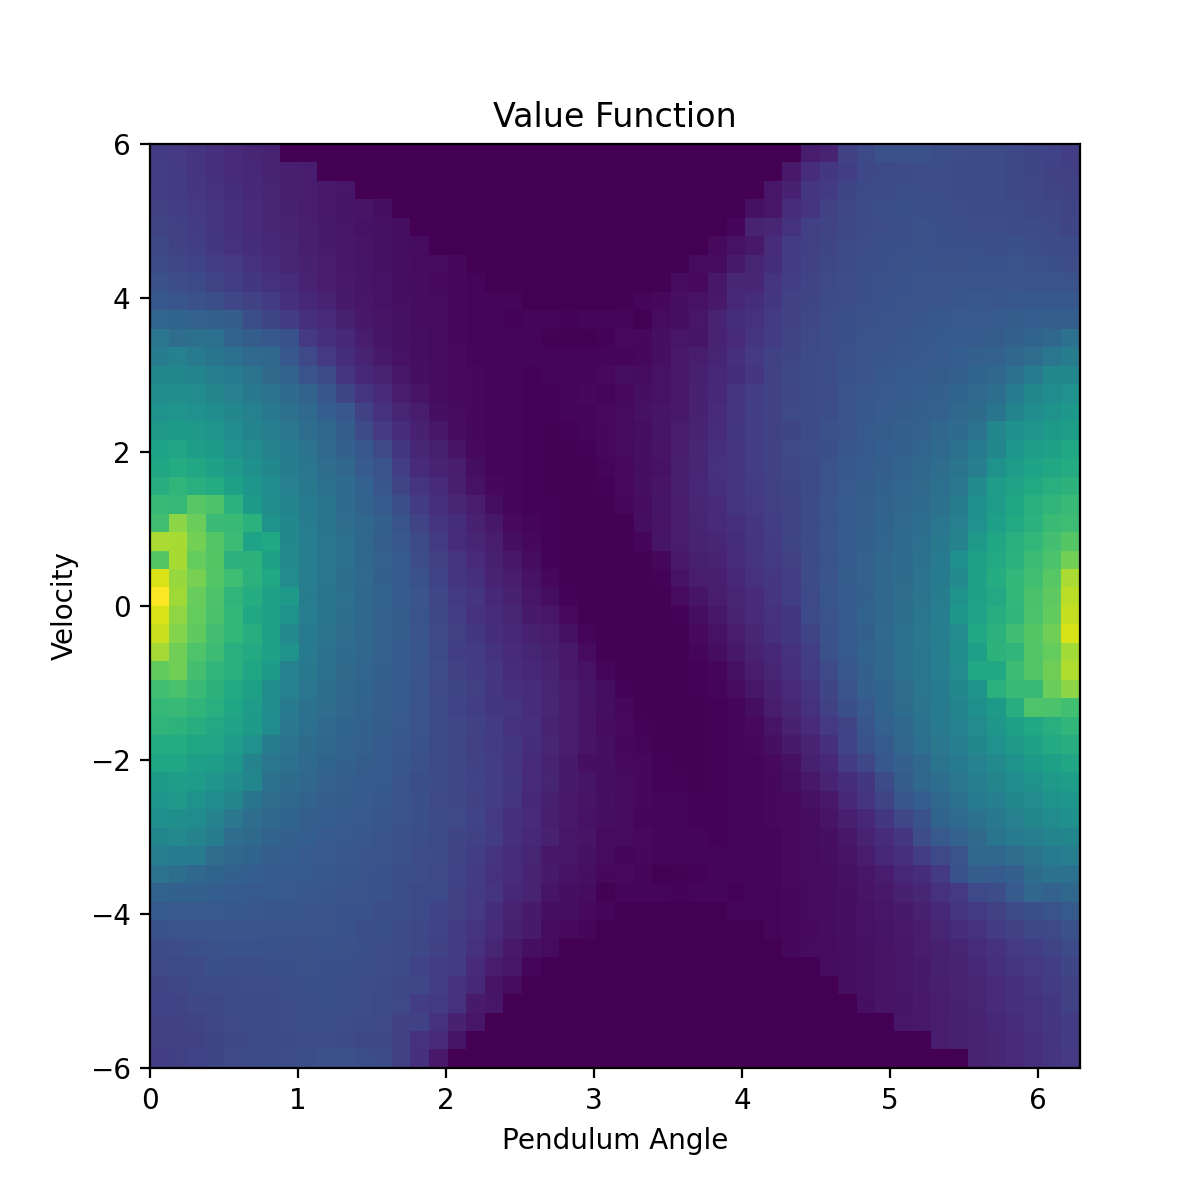

<IPython.core.display.Javascript object>


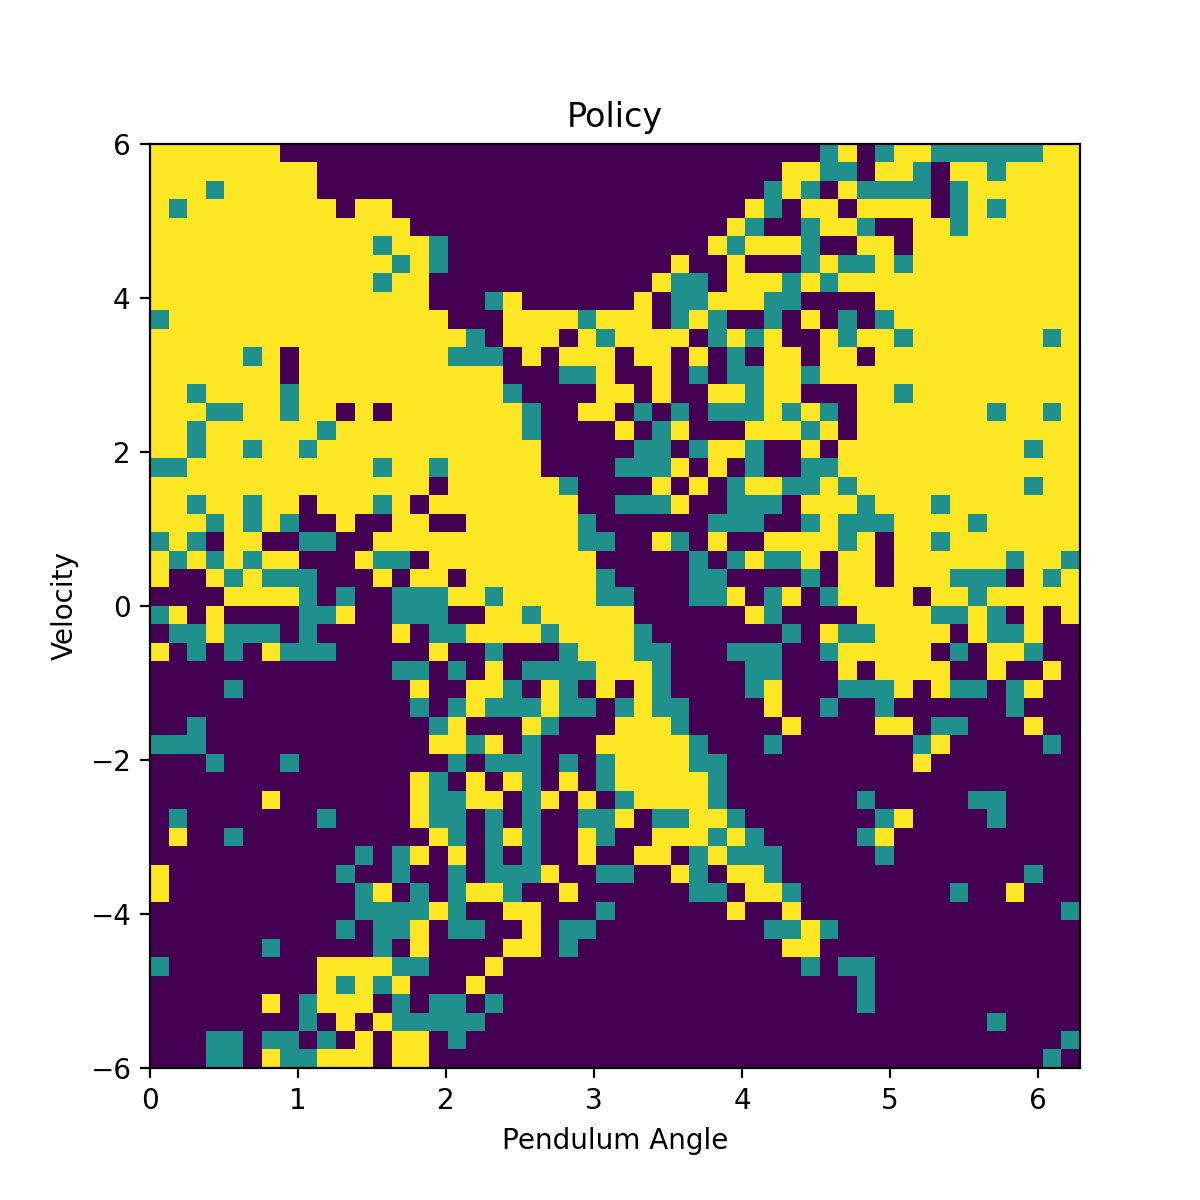

<IPython.core.display.Javascript object>


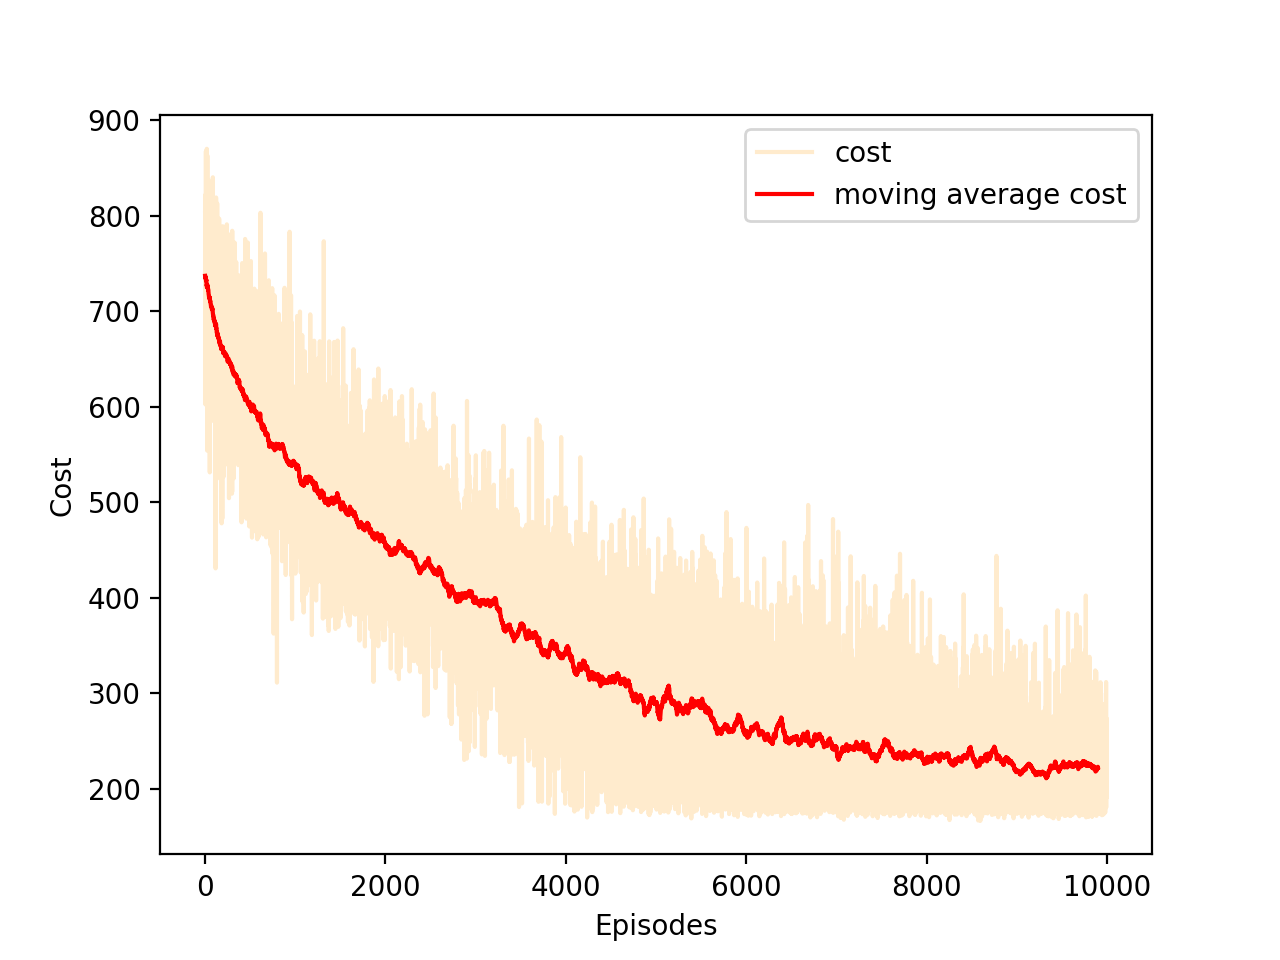

<IPython.core.display.Javascript object>


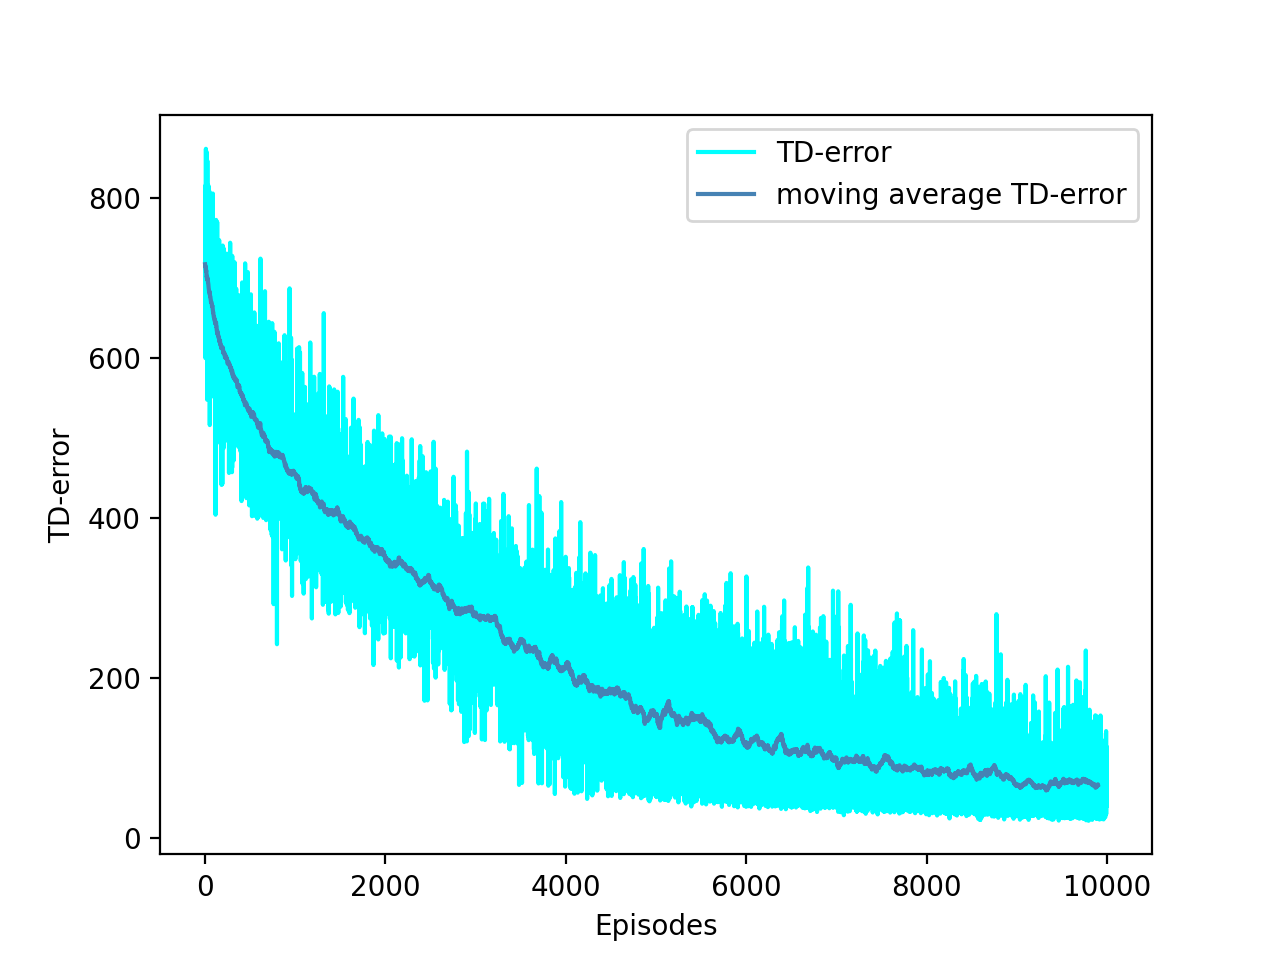

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAgVNtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
DSxliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwABR4e1643dg1tJ0AAAGsAD
pCLH/2+kONwAT9lg/NYjL/FoB9aiK4jE+YrYPvM3VJY4vjNnyLGP2YlbJp/NpBJUrBdMYUhyrz7P
5apm+oGk4bUbHFR5FzyI9ajBPlsbHoOh7z8pK0EiqMUzXsdnSuPKpMBaFdvexFsZpfdheIkeR9nc
0ITyzYHeeS6JwPjmtV2sfNoqzekXITbJ4Zh1jvl9n08hwvr7UO02jXn0Owh50dZbkF56hR4wicCv
LRwpELwO8cN8X1MJqu0gEEsxhIs6TP3YdJ0Pua9JN2ZwU30ZwVPYH+AOycAUF/b9pFk95XFVtil7
hBi+dCSaTb0xDWuZN3nGq23yvHA3IO5jOgNcsA86rABY6i3fm4ujHJ0imNhaD37uUGnV0uhFHwdH
qWMHnkkZYv5dDA2wu60wFshsv+7vyknpJNmZCjrW5fWwDsY7fk9RABc2Y/lr+wk7/NGHIb0YQQxy
RRWCFarsK/aNM2xEvpIkCQUbDhXgNX+BT8hpLy685q4JAynAJqchmsEjI/9/DUOjqzYyxR5TTRrF
7AmyAdR9vuHOb9LHOidxhkifkFnoC8u82cU/6mDvAAWWuUTbBQfyx5GxcLnqexfshUiZjj45768e
hLAs2eJLYzPFtXV2hBtoLo7+9fCQ6IpTS+KwBFeG1bCGsGrJccA+9Sbtfh/UNY8FgLXkgAuA+k0o
AAASwwUcqaY5Akvpse8jH8v9EdIcUUXL4xuks8+sDPCqFyziwU6pncxbFxX68USxJDzCQAv5XwEq
DMfXBHi/b2SmKKG3xm81Bt3y5Hv2oTUWq4CTml8VSdoHrM7pTAeJvuLAQfoDVsnK4o8YPiuUioIe
wVd24YPYo8DWI/fhC/0mQCfNRyv+TaqapFT0SgtuJwaUTUBknC2JVyjBW/5zQcq3r6yvnDtWw0Xy
bThQf3sKVRl3y3sHePLyfqdUfrWomF+aEI7/8vNSgq/vt+euGnb1b6g8iPLW9dVUECSnnrR7oYrW
t+VdpV3V9L7ZxnNp9LGfmQZvTGf9e6Q2omsxVxPmRM/5uDGk59cKi2KUZu5aSLTVT0hjpcvGMVor
Ts2bj4jRa7Cau6mIGNLvywxhJMQ7pYz8yESi+T97+Hx5avNfXDFVlYv7yTns/Qkv5Qsp5ZbCyWoX
sMk169bksieDa43Kj19Hn7Hn00VIbKf7NXZFUlyBtAepTYmAGtMOwlHEyTrJrLusHYVsLqodbjAm
u8twOYQ7ruicviQpCYYCJZn+0uVhxD/+/adz/MTGWxrm7/IaR5cpeK+gUxLWBf2S/c3wsE4g1yS1
kPpGlk2bKeEJKYPbNjNklOJ8DzOStycko4ACaZpeEqhsl9YOuC3kIr7Y4avvbJwZRyNm1Krn5AHd
b3coo5N9GpB0n9T8UiO6XDjzLHVWLcL4niFcAcX+F47lP0AWc33BYq3oyEDtklgwOXJedyq46VWy
VFPYcIVfkEX6lbDijFydXQnxn4VNIs9pA846WVwfkPKp3dTRH9f923+oNID2hnlnACrIptxmRu8/
PJ0k9A+w3uofGuZ3VJsseq+BGeg75jTXY/096DnIX5NvWM4LtFNXdsfWb9xcIac3SV0VYE29OGNA
hLp/hsqdxMBFaKJ6TBSQnYuD52UAi6RzkJU3CInYtrBwmIANLI6HOYWCZX6WyPxLmtO0xAo6T5SG
yq5QtYWEHeSWWTGo6xR8gTWCrfNCl+tYx/kLN9WsZdpv7HIf4WsqEzwH+xvS/0LWSt6ZvBwMvwCV
a1OnwtKMrcTC/QIwYe1fol6AnrEZgweU/3z+JB+0Em56NtZjPrnxtL1Ovg2dMT+a4HYFJZHjJ6+L
bOIEPYfB3t/74dHRpTlgI+nj6GVMWGQiKaI/27iBBCJ53E8hmIJstxunoCOXqoz7svyi8nXa7HA/
naRKw9FYWAOS9SYKJl5ycquKtHUFZCYx1Yix7a1w6XhQW+SGs79aOpQ2kxNPHIuFCWi8TXTaTFiz
YiMytqdNMeWTyUxpXo48kInttlvpH4vaVSiEGAEL1D6/tceXNREOZBCApZuUjD08IuL8WVVughBB
F62EmxuCoieq12PSZTjUlElS+b+Uckuvg6hgnePot11MZBVjwBrKUuHbyUaeR6hSwHXkJ4iDEdMs
9z+nhjaUhBTIAAZ1zb3z/+DhF+Pf/8QX6SzXY8e8YhMpck4ZGhbHalkuPEByMATp0VPKQHQygv9G
RdVeJWzc8k62I3Hw3pNUBphkp3pEI965UAtQkAY+Sa666eY/u3EzDP8pnYXYv1fiT8GBkWShfMpi
JtjD4PuYKwlebXlYMM8glYHabeKSAjzWWGH3+fwlrh+TgF5Z+Jz+3RrYGAABRVBDEKuqCuEwK7A7
ieyLEVyqiAAAAwKtJ7zKnTR5Gz/+MRDKAAAldcY7NfLPhTJYxJcA0Ju6kwEesmj4urtsBf21YsTG
0sLJRTHqeMB1HSkTJr3lDep1ZjbMYuBKcbF5ADmYrxRg54PXcrsvQLAfNO6wnE+4PtyvYExo+8Bk
oHTTBS2bK1DdpnnjNo2v+AhP6ptMVDhV/alqyG+pH54CTR3buukqC+a/hzfccQeVHZjh4Vex73Ip
KNYvxo1TzcKdIGKZq+qZIn6q+97Lb6ZlRIHUs7gSK2fv2SByxsyG9Dtu+8BTwDclXn0usmKbDaMV
pZ2HgwSh7hfYOq0RzqvDZSRvzjmMpWOzuHjDsibG6yrrKMzb1XUsd4ZCIsv+YFNNjs+Ci0O4SqrB
dAVNMYU/mw0ppLx9AbIxtOCpne1KIYmmKxOQzGs5S//xNaPlu7zlkMz+/mWM1fi99A/aUKcoBDYb
DHXNU2uXN3scOk/VfL3x8

<IPython.core.display.Javascript object>


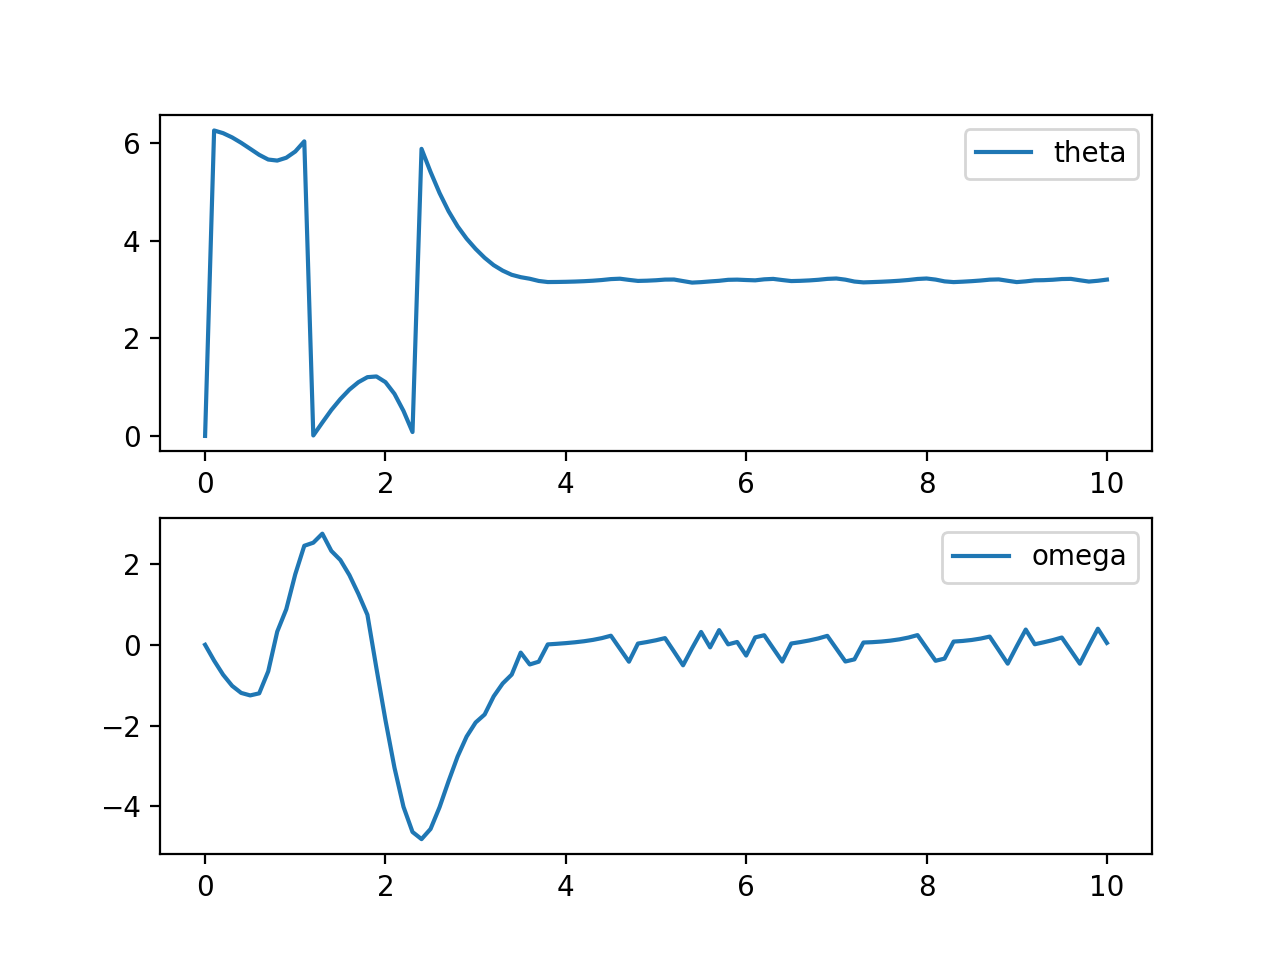

<IPython.core.display.Javascript object>


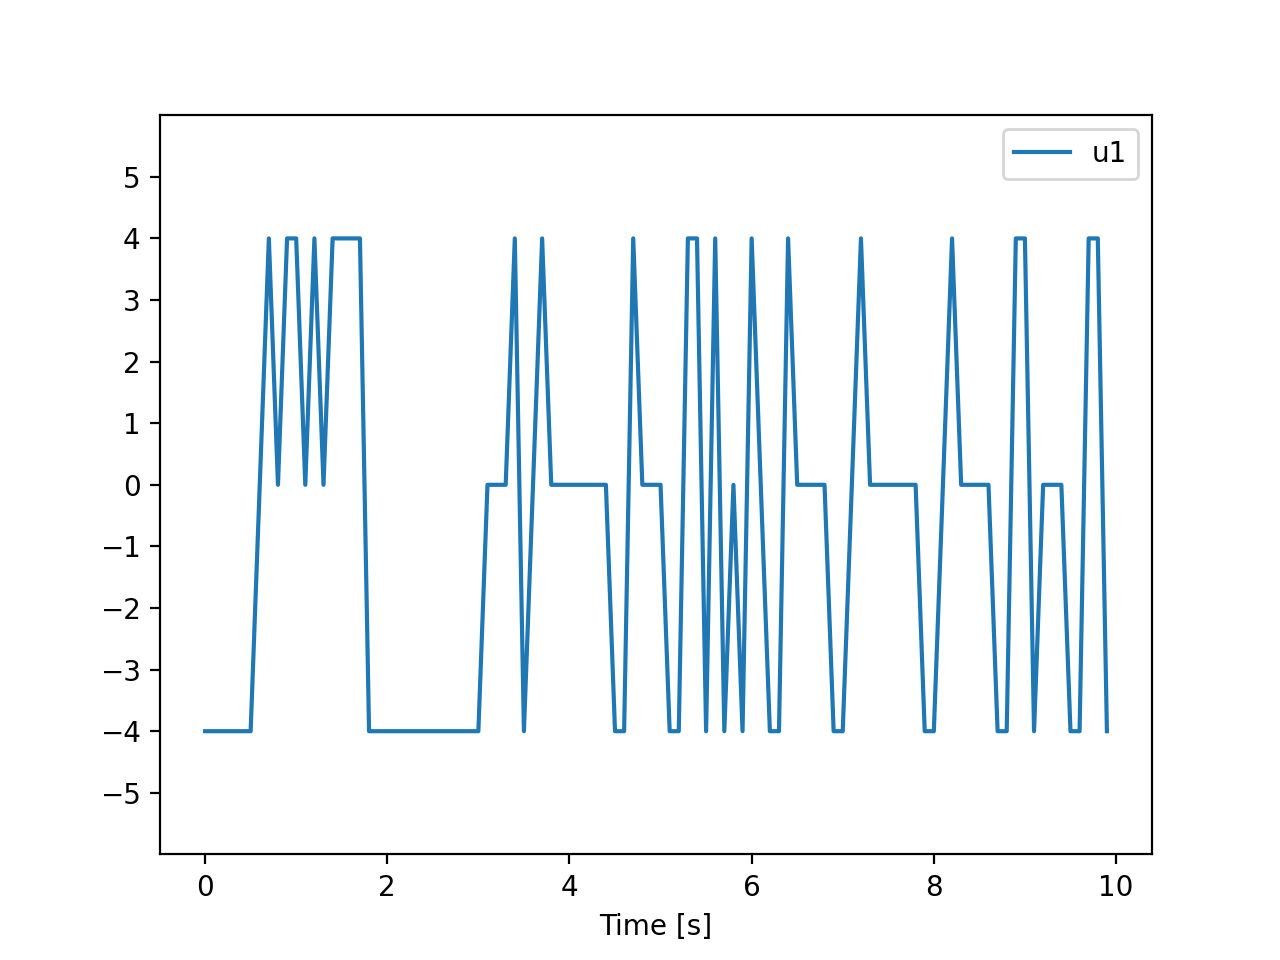

In [6]:
generatePlotsAndSimulate(x1, u1, t1, 10., QlearningSolver.value_function, QlearningSolver.policy, pendulum, QlearningSolver.costEpisode, QlearningSolver.td_error)

Creating new solver from Qlearning.py with u = 5

In [7]:
QlearningSolver2 = qSolver(u = 5, learning_rate = 0.1, epsilon_greedy = 0.1)

Training for 10000 episodes having 100 time steps in each, with alpha = 0.99, epsilon greedy = 0.1, learning rate = 0.1

In [8]:
QlearningSolver2.train(epoch = 10000)

Simulating the pendulum using the controller

In [9]:
t2, x2, u2 = pendulum.simulate(np.array([0., 0.]), QlearningSolver2.inverted_controller, 10.)

Generating all the plots and simulating the pendulum, the moving average plots have a window size of 100

<IPython.core.display.Javascript object>


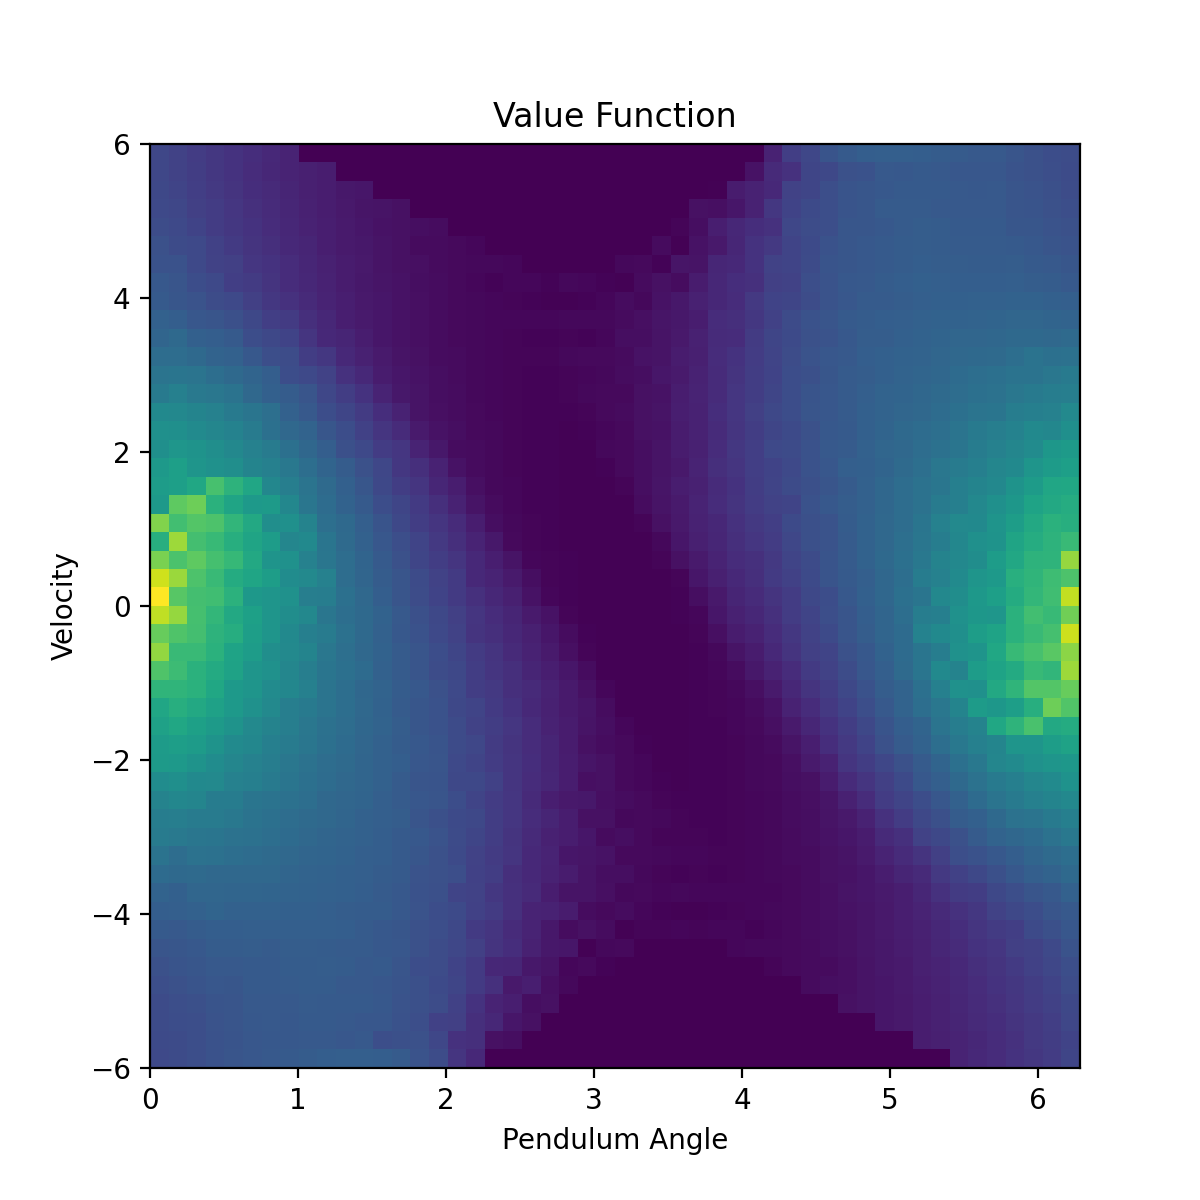

<IPython.core.display.Javascript object>


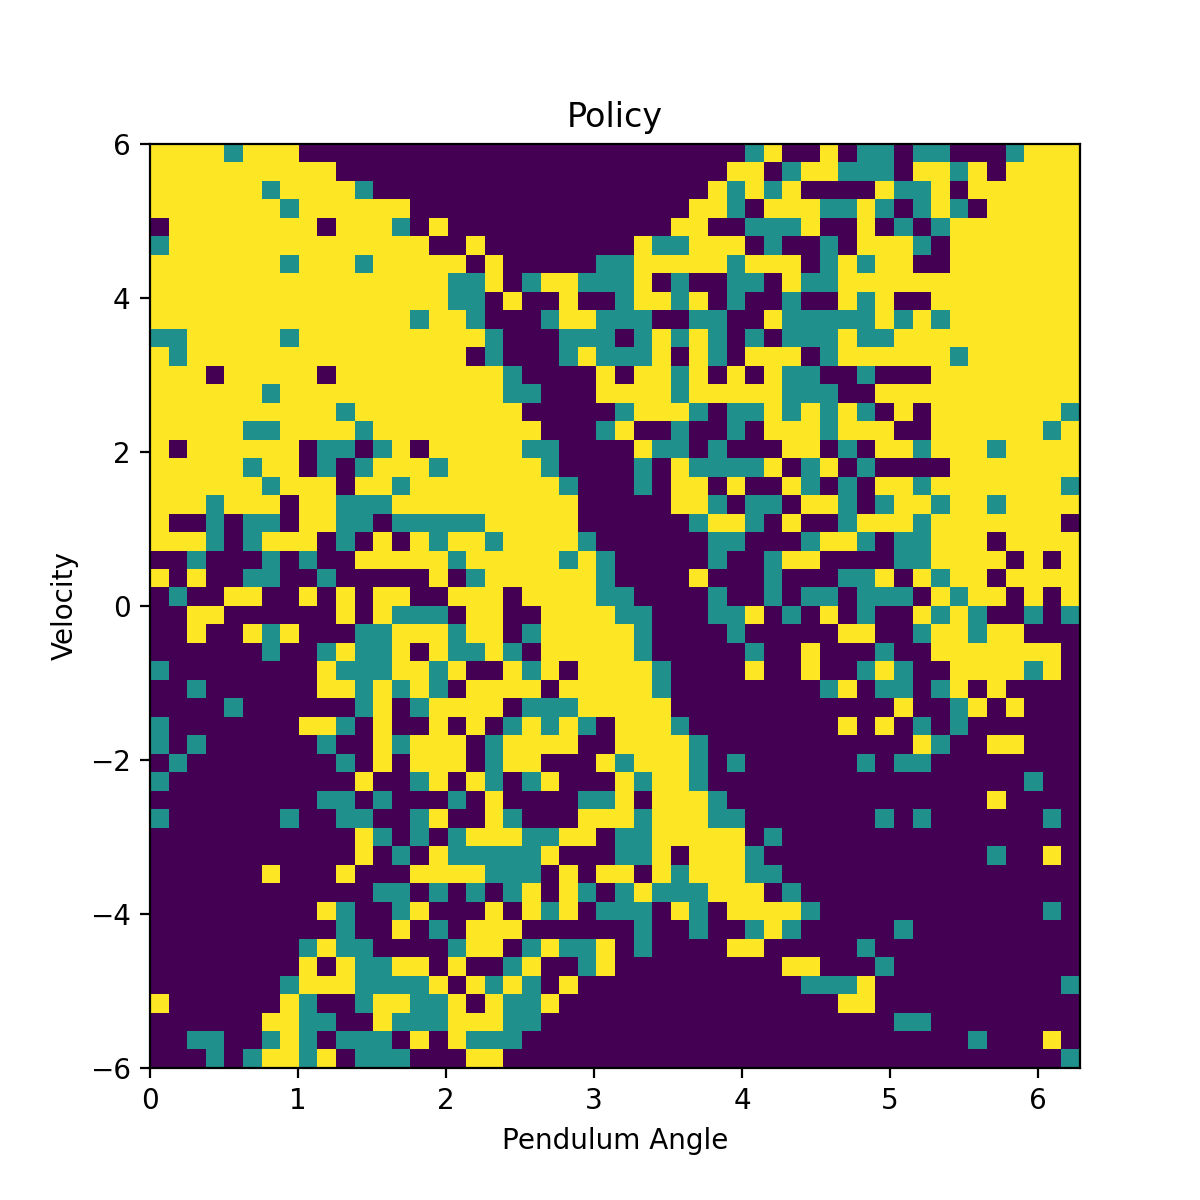

<IPython.core.display.Javascript object>


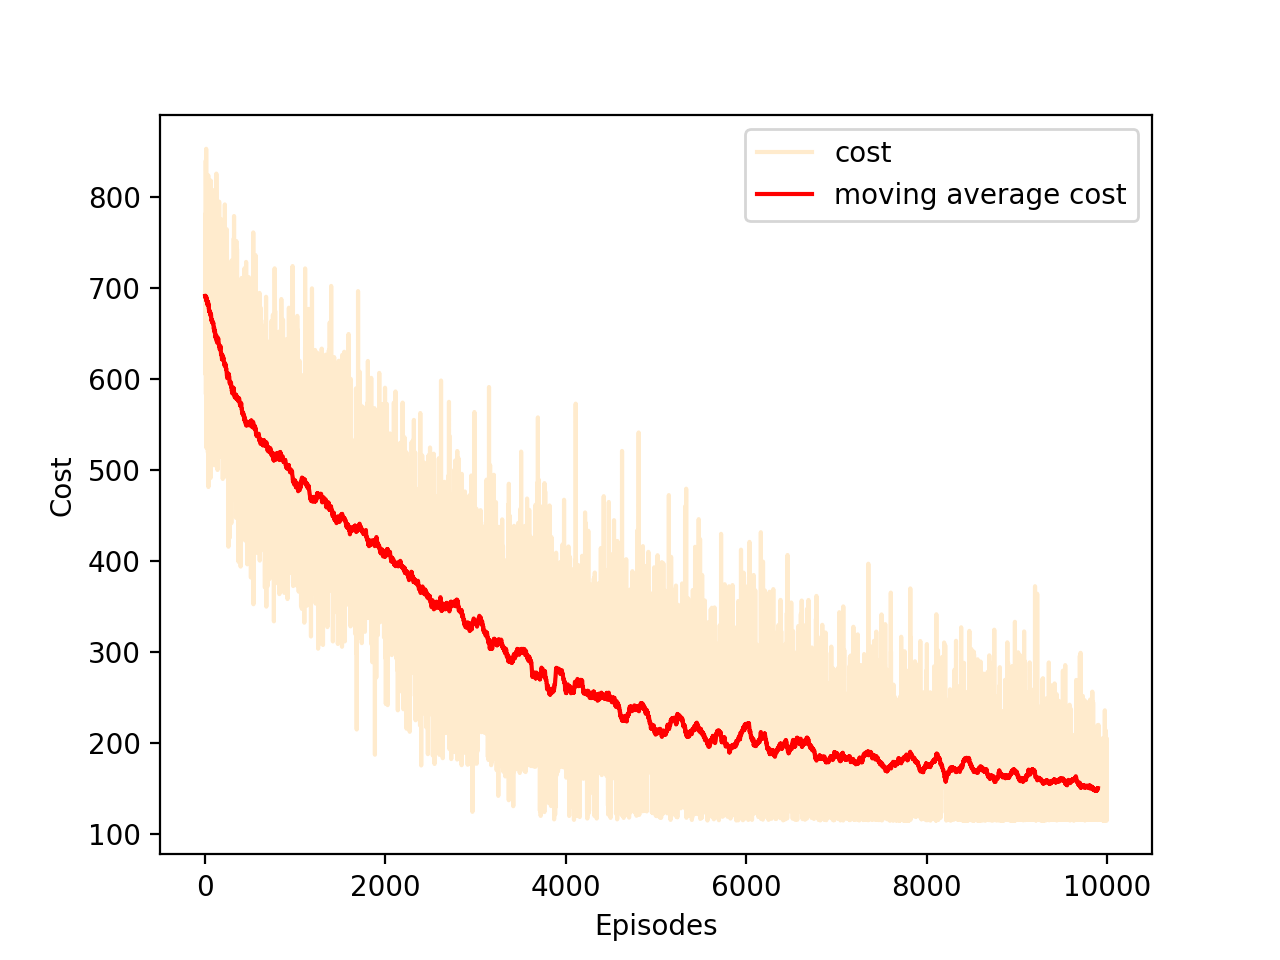

<IPython.core.display.Javascript object>


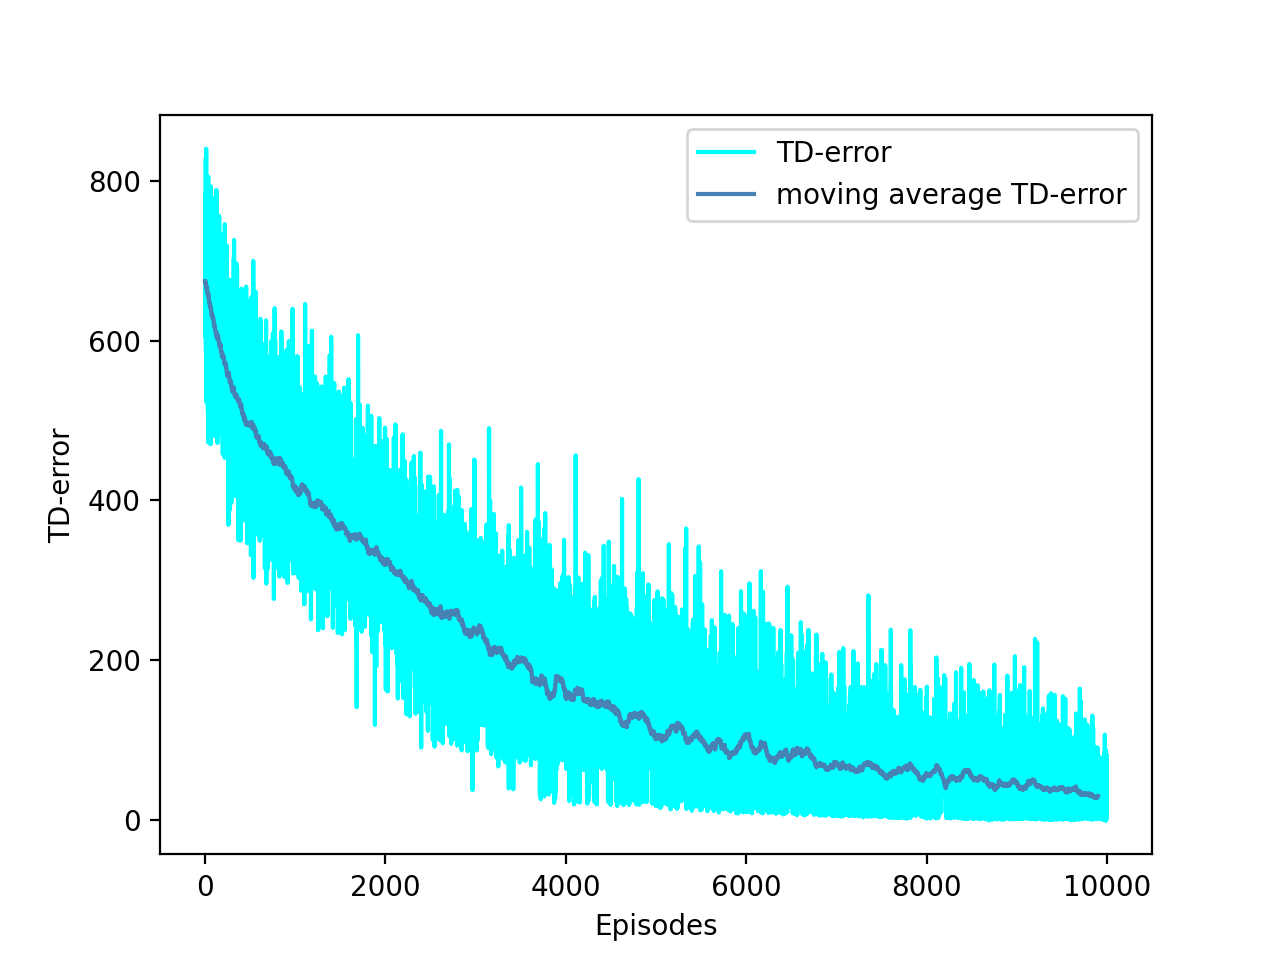

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAdZZtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
DOdliIQAP//+92ifAptaQ3qA5JXFJdtPgf+rZ3B8j+kDAAADAAADAAAVt6RlhkJ0L/JiAAAFfACy
BmSZ6XFJE4APMMeydN00/CqHQhhc9yCzH9V06A+2kmTfGbPbmhAPY3EgkBOONPsPaEewkllXn2fy
1TN9UNOLuVpCg16nA3KBIICjbY2TQND3n5QxoJFUYpmvY7NlYgUyYC0Gbe9iLYzS+7C8JQLMZGRo
QnlmwO88l0TfdHNayNY+bQVlMTywhlcWFi3wo5I9OWpDp/O5o69Dh9VCAAA7ArAJGcKIhsON1YTX
SZ+7DpOh956UxbX9JHiFm0hB1kTY014bpjWhUKbF1FKiWxxbaOI12ZNFiDZaGNwvH4gMJme2NhsB
5ycEpJAa5YCClinPEpetz3uLnx008RArAv0e7lBwVdLoRR8HR6ljB55JGV7+XQwNsLbloxnm0Jci
Y1GRGLBEdeoJvx//X6nip2NswUwAubMfy1/YSD/ic5nyOT5RA3uorBCtV2FftGmbYiXunqiOpVpK
I+2r/Ap+Q0WuKVcxKnkzawE1OQzWCRkf+/hKqsKQFeQo8ui0BLWjORcr7fRcv6mtXXQrHNZ5TLXy
vz07HuJ0r1jP1MHeAAstco/y6d/gZv97QP3wjOzkveqCynjnvrx6EsCzZ4ktjM8W1lNaV4DuFxm+
uCz0QBtjwO3A5ZbLNFqrcgL3UitPeJnAVAs35DuQE4AAAAMAAAMAAC1tZ+0C8UCh2J0J5/pDiii5
fGN0lno0x71eIwtqvVtzZM5OWEQXCzJMSQ8wkDATruAlQZiLkYQ+di+wiiht8ZvNQdd8uR79qE1F
qvAk5pfFUnaB6zO6UwJib7iwEH6A1bJyuPPGD4rlIqCHsFXguGD2KPA1iP34Qw9JkAnzUcr/k2qn
KRU9EoLbicGmE1AZJwtiVcowVv+c0HKt6+sr5xFpRoDUImMcSRMReLZNXTkCCjy8n6nVH61qJhfm
hCO//LzUoKv77fnrjHfdW6zy0QmHYK98FRJTz1o90MVrW/Ku1u7uRgOuRnNp9LGfmQZvTGf9e6Q2
oms6hL32NmKXcED97sbcF+DK4x8WuWbYMaZPBIoWnD7fO+9x9IT5GgY484I4m1pW+vTyNNF6dehq
n/VwRFvwxLGWft5olRq9J7Ub8vcIAAADAAADAAADAbx8Fh92vFiQwihI0oWAowcnJ3TzdBZXvvby
jiZJ1k1l3WA+26SK88sXv5nU6TwtUliRglaBbVG+AiWZ/tJ+c8sPm0/hg7Zuu7CE09/kNI8uUvFf
QKY6X4z7Jfub4WCcQelIH+43XSybNlx9Zn0hGCy1g4Z7t4BafjM+aUcABWftTrFhsl9YOuC3kJX8
/vYEemT00WseFiKio8qXAj7qLuoFdmGzrgJuGw2IWQldfDqj1HHAEaTnv+EcMBWBIBOl/P0/Cy53
AGK3Gs3ccJeG9Y1nw6r52DCUbwt0TBprL230StGY+W+a63lOjC0JxP1XkQXvMtq1nmVgHlLmfHsi
X7LcWhaq5almlP1sGyyXOpaLbGLg4A5yJ3ajLiYeF3lAd2XeMFOXj2IUMK5ZcJWEXmLLqD2cW/io
70aAI3dwDZNYsbHwflOATKkBSEA+NRZT9lf4QV2W0zVMq47WhqdHiiZpgw9pStw+1luqg9NGy5L2
LBtdiYOpK8F0rg+dm4DbavYw9JEk1bH39ySmrlEl31wpCB9mc6v+THxqqqvy6bjpVEDuh2DVG5gW
FTe93VMHtkQlayHOCZ4zbOm6AS4tvfzvCUp3jB8MAAADAAADABGeAPtea/jYdsXMDMBwbGM86BCc
008McZR0RTWD32Lj8fm3A7cMgpEYoOohPdmAhO7PmjLkMsiH+YO5ExH/TyTfE0fj2Jl3uN1+LK/t
P7SxFMMPard3JuYh/ixcINPMpKuuEc1sO8+2tjmhIL0N/p2L2E/pJOsRND5MiJTVqtsBpm8/vbx3
urR1d68IMJVhs/Y+Qifea5bbnYk9KBjyuQhQ8hXunjYa3Pm4scUFG3+nrAD6W/5y+xVurt67Pyyh
je96Qvmih3jw83DUsQrenle2R37mNM4u8eGkJcTbd/o0qOdl5bkNvuWV5QTVJB9NFYVQFVVRAuaN
Ow/NN156/cxh/QT5Vf5aSjEUDeSP/7eFQpAfJf67h3rxj1LHcm1qjzjFMYNJn2IrDOKxRcm7B7UV
zN5nnDzI6qVDj7//VH8IO8Fp52kyYSwdKDldVMk7uKz9ZDtASxnEfnixHWdYAAGnEb+GgR0f8eW6
7ymUbz20jAJfnn1Gj38yqPb/Sz2V5g7q8LGd2xUmFNvUPxCQ0HgpRr7MAOcQu/5rjUtdwoXDvJ46
86VNkazaAUAwOdrIGjJXZZuf9+cbYAs0udXph9nyTcn2Rdo58nQUoBUHI0nE2j6igj9/87pbZ4Dy
dT2mmNj0cQeByti5T9QOJQYEqz8T5mG9eTrVh/1E2wJJ/22p3sLfybn4Phj4zx3D53rO6KrrGMnE
rM8AIOZZKB9Bcaze4o5+wcn2zj7KfIWynnc7WwOgdhN1txc9omrUPL6ntVeUQN33YrLc9IEZZRou
znNNu7Oy5bc9HQFf4bCeK5FWeFlJQgNpCqgUmowKh1dOvKBwyDuMcGETbvclX2Jb2wLjz3JCBBKb
iyYiuF9g6rRHNOxr/Xi/qJoKVjs7h4w0KCUElzRO1fKEdFWEax6Ga/8ShJFUMUuzVcWCKbry5dMj
+VHb4wAe6QvN8106spAiRMToRrb4NEAKRz/23qTTOi9jH/v5GJoNPGEE94l0nQllPnF8Pho8X5x+
JKn2HuXdgG+PULCVNl4hDgzDoB4OY9f4/nlPcFxaMasYeRYsItPSutcHwAVSMW8RgelM1m+E+h2u
s/ANoAAo1IeiFszU5A2Mi

<IPython.core.display.Javascript object>


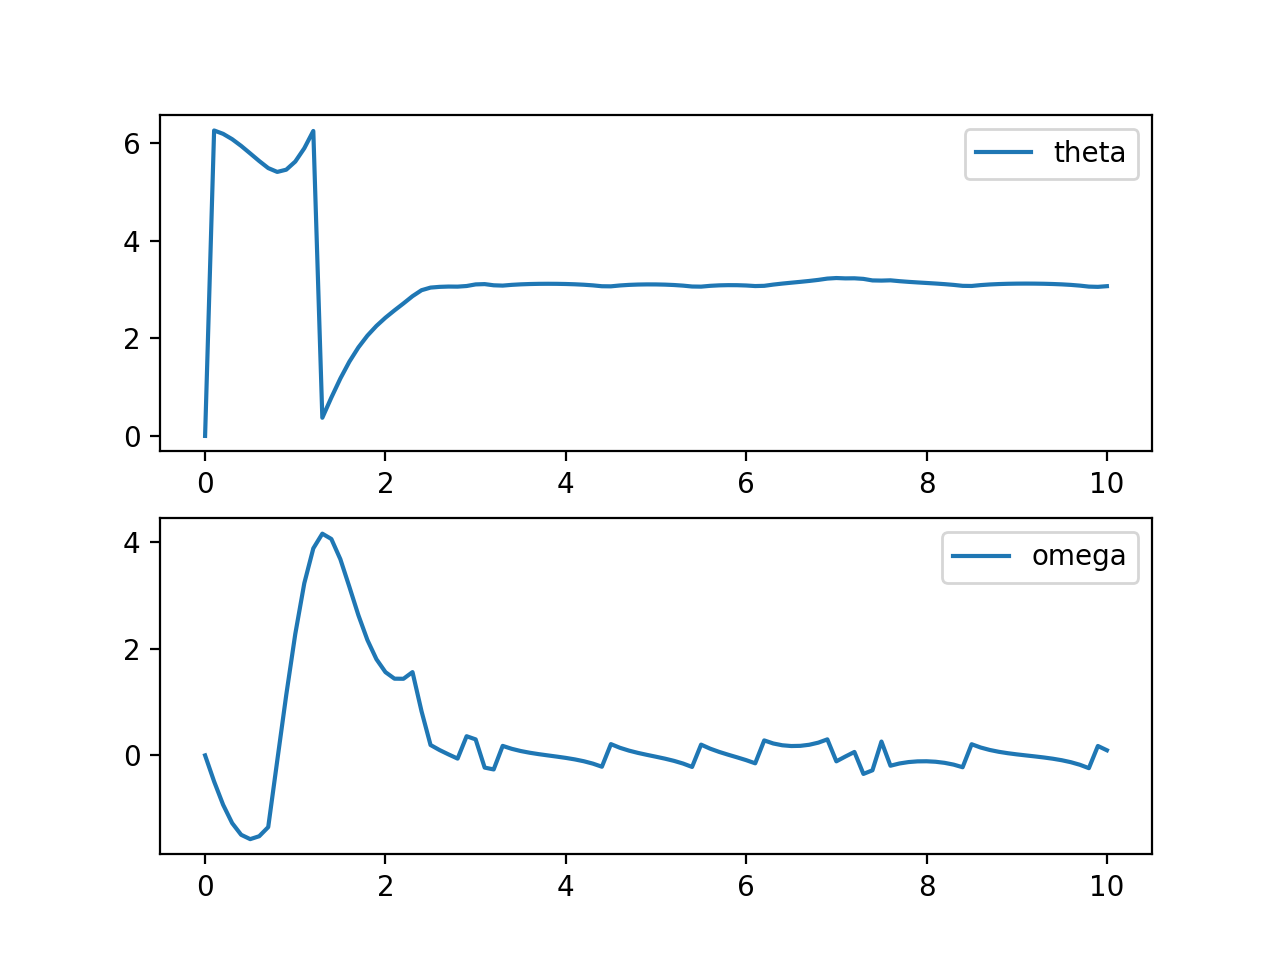

<IPython.core.display.Javascript object>


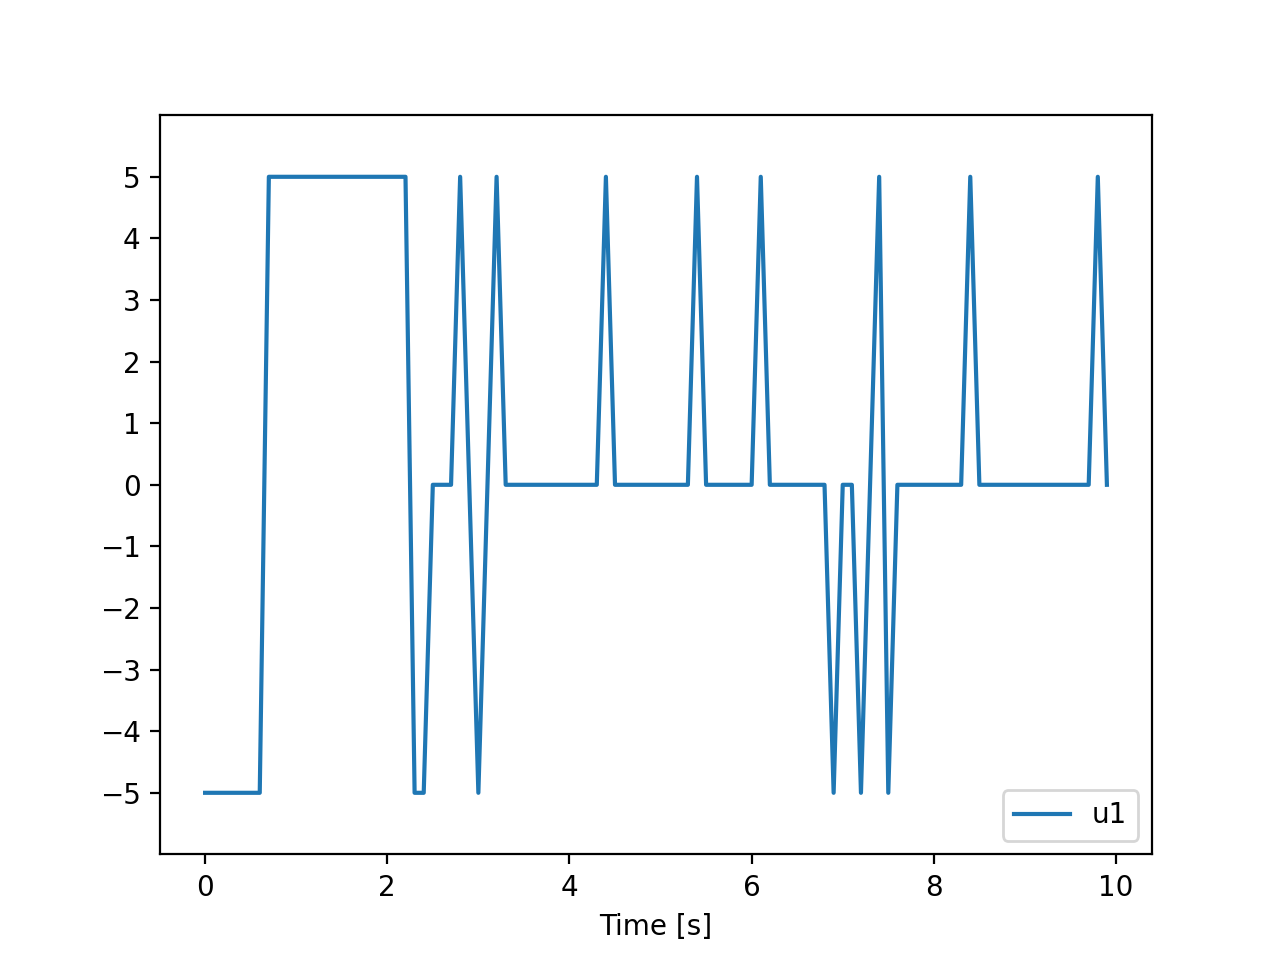

In [10]:
generatePlotsAndSimulate(x2, u2, t2, 10., QlearningSolver2.value_function, QlearningSolver2.policy, pendulum, QlearningSolver2.costEpisode, QlearningSolver2.td_error)

Creating new solver from Qlearning.py with u = 4

In [11]:
QlearningSolver3 = qSolver(u = 4, learning_rate = 0.2, epsilon_greedy = 0.5)

Training for 10000 episodes having 100 time steps in each, with alpha = 0.99, epsilon greedy = 0.5, learning rate = 0.2

In [12]:
QlearningSolver3.train(epoch = 10000)

Simulating the pendulum using the controller

In [13]:
t3, x3, u3 = pendulum.simulate(np.array([0., 0.]), QlearningSolver3.inverted_controller, 10.)

Generating all the plots and simulating the pendulum, the moving average plots have a window size of 100

<IPython.core.display.Javascript object>


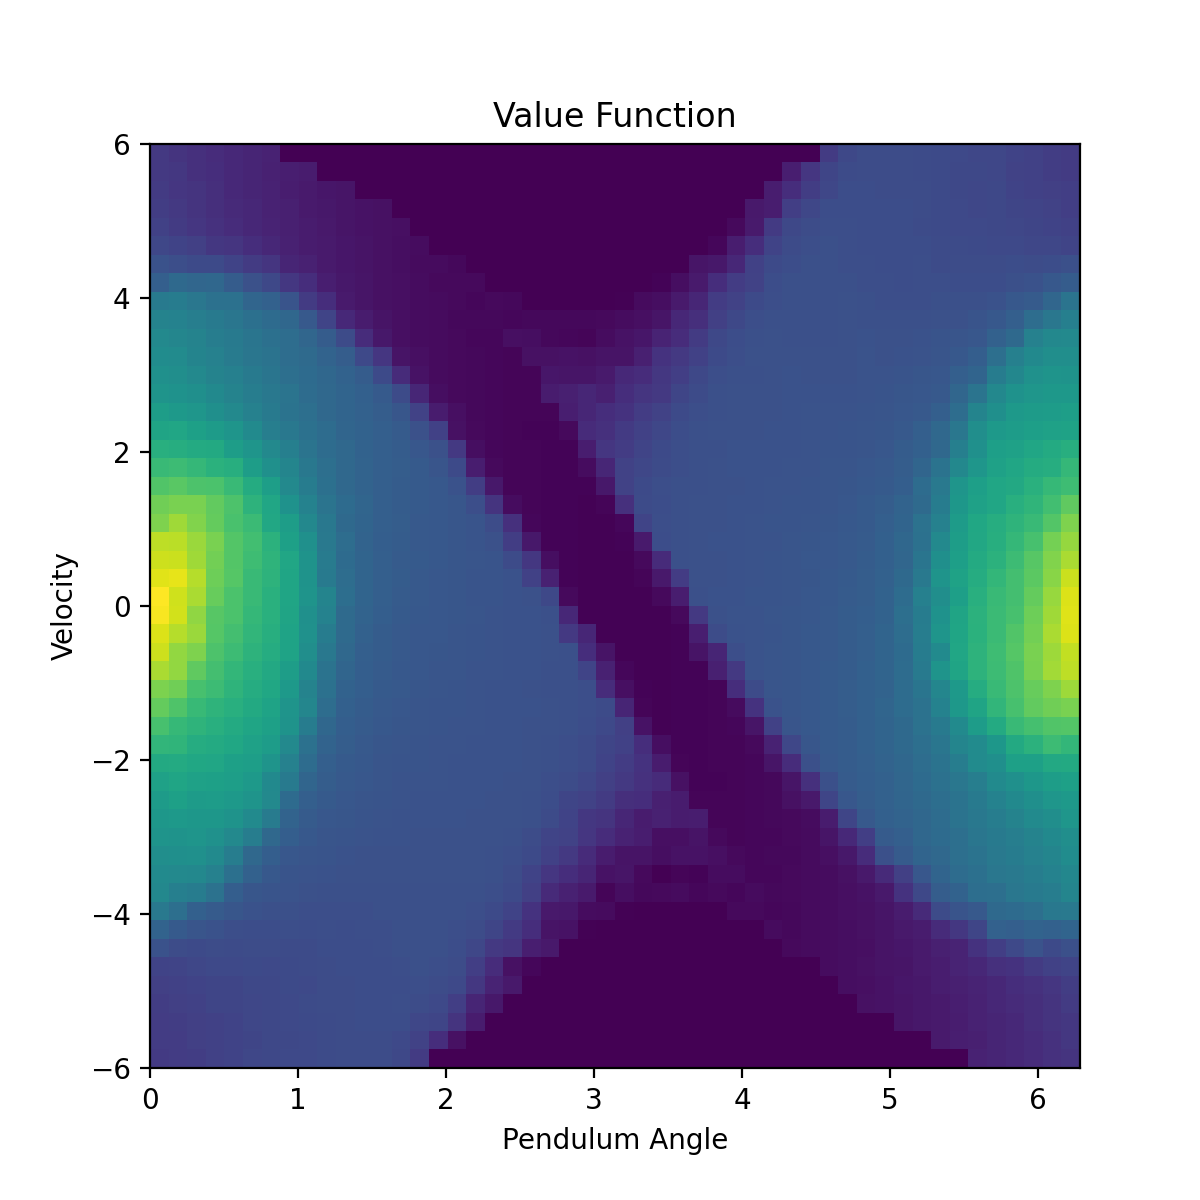

<IPython.core.display.Javascript object>


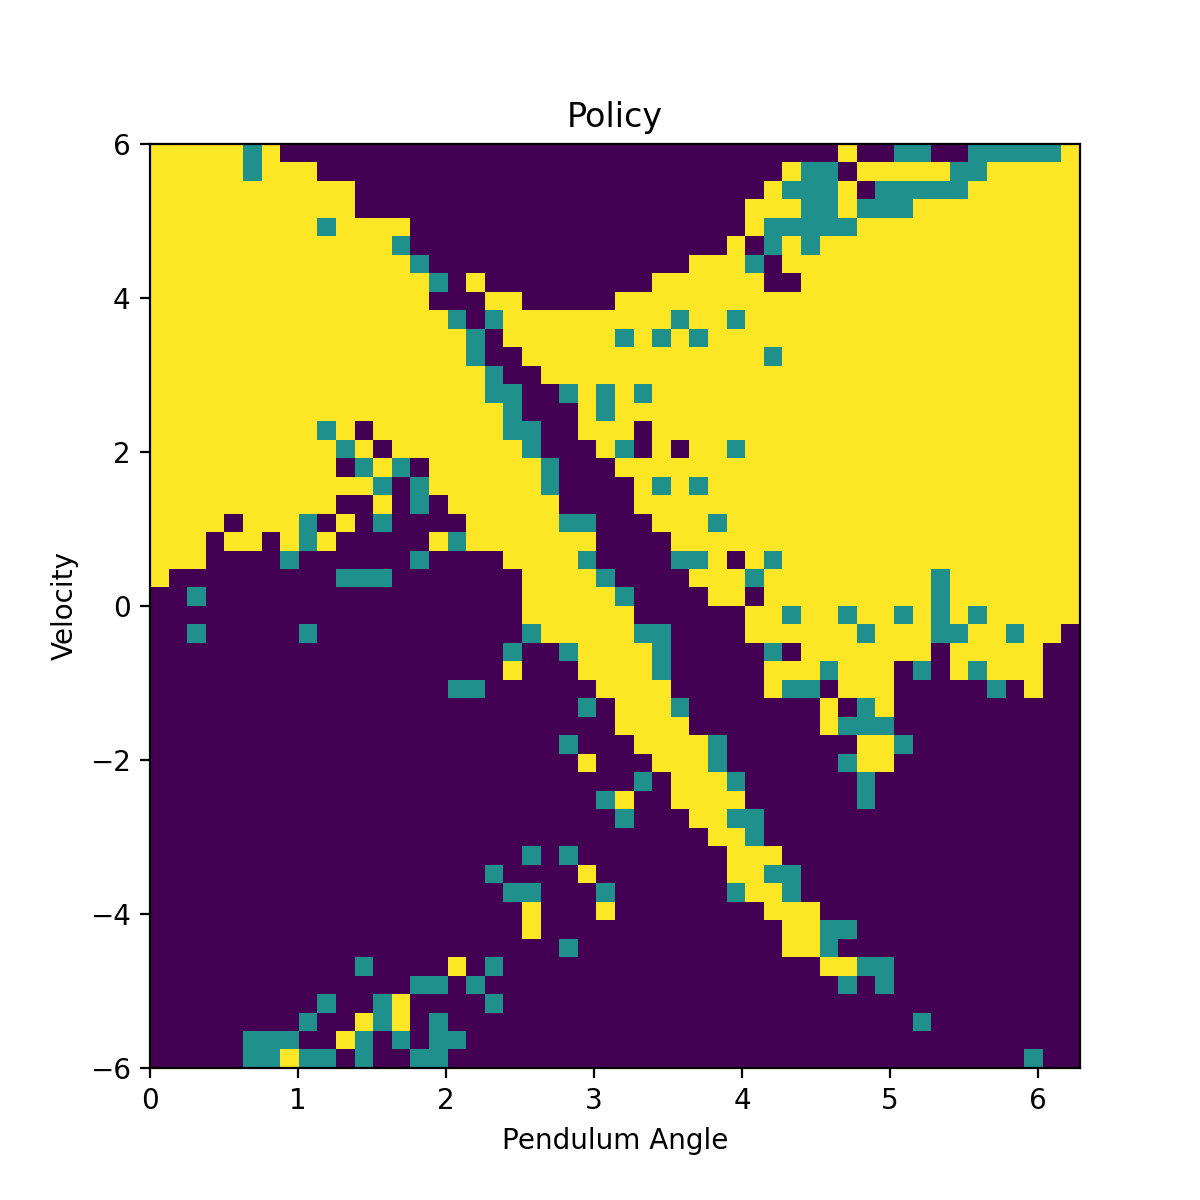

<IPython.core.display.Javascript object>


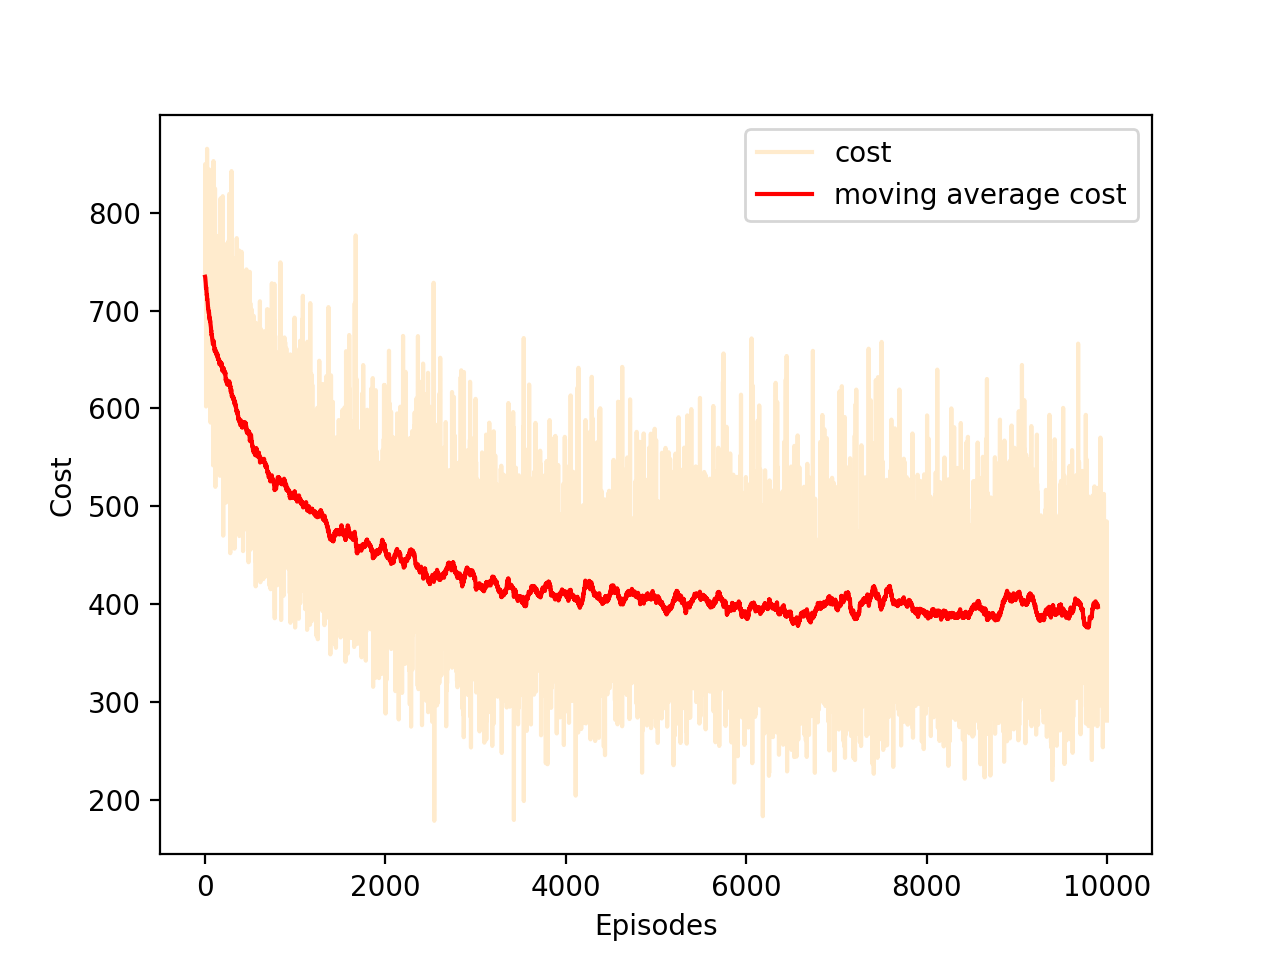

<IPython.core.display.Javascript object>


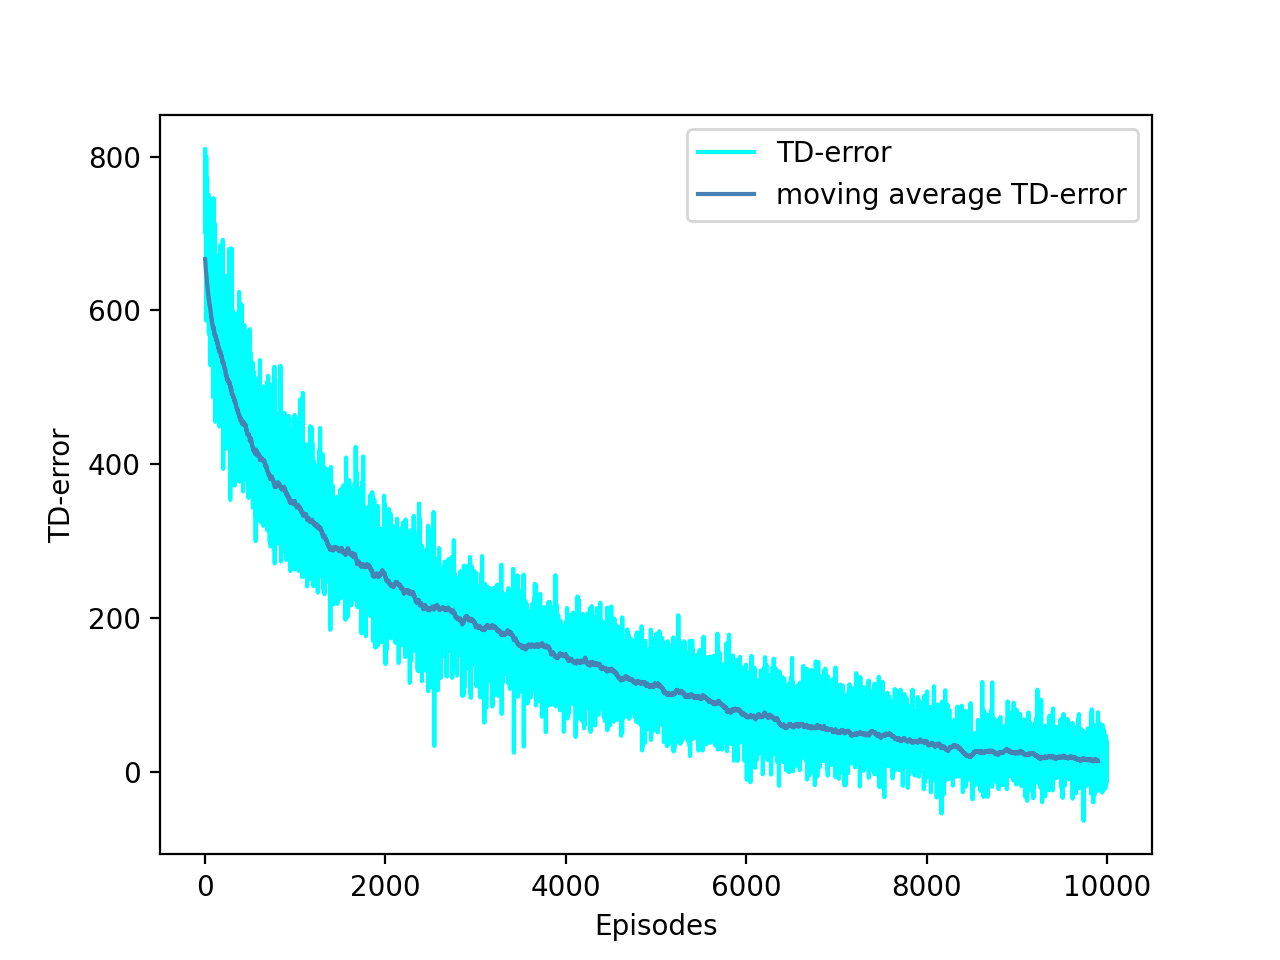

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAfNNtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
DOBliIQAP//+92ifAptaQ3qA5JXFJdtPgf+rZ3B8j+kDAAADAAADAAAVt6RlhkJ0L/JiAAAFfACy
BmSZ6XFJE4APMMeydN00/CqHQhhc9yCzH9V06A+2kmTfGbPbmhAPY3EgkBOONPsPaEewkllXn2fy
1TN9UNOLuVpCg16nA3KBIICjbY2TQND3n5QxoJFUYpmvY7NlYgUyYC0Gbe9iLYzS+7C8JQLMZGRo
QnlmwO88l0TfdHNayNY+bQVlMTywhlcWFi3wo5I9OWpDp/O5o69Dh9VCAAA7ArAJGcKIhsON1YTX
SZ+7DpOh956UxbX9JHiFm0hB1kTY014bpjWhUKbF1FKiWxxbaOI12ZNFiDZaGNwvH4gMJme2NhsB
5ycEpJAa5YCClinPEpetz3uLnx008RArAv0e7lBwVdLoRR8HR6ljB55JGV7+XQwNsLbloxnm0Jci
Y1GRGLBEdeoJvx//X6nip2NswUwAubMfy1/YSD/ic5nyOT5RA3uorBCtV2FftGmbYiXunqiOpVpK
I+2r/Ap+Q0WuKVcxKnkzawE1OQzWCRkf+/hKqsKQFeQo8ui0BLWjORcr7fRcv6mtXXQrHNZ5TLXy
vz07HuJ0r1jP1MHeAAstco/y6d/gZv97QP3wjOzkveqCynjnvrx6EsCzZ4ktjM8W1lNaV4DuFxm+
uCz0QBtjwO3A5ZbLNHUwgybKVGO6l5lKTnnI6zPp4AAAaYAAAGVjVruK5UCh2J0J5/pDiii5fGN0
lno0x71eIwtqvVtzZM5OWEQXCzJMSQ8wkDAkd8BKgzEWg63BKxaxx0udQirqg675cj37UJqLVeBJ
zS+KpO0D1md0pgTE33FgIP0Bq2TlceeMHxXKRUEPYKvBcMHsUeBrEfvwhh6TIBPmo5X/JtVOUip6
JQW3E4NMJqAyThbEq5Rgrf85oOVb19ZXziLCjQGrxMY4kiYi8WyaunIEFHl5P1OqP1rUTC/NCEd/
+XmpQVf32/PXFoF6b/x8RCYYIr3wVElPPWj3QxWtb8q7WDu5mBBfIc2n0sZ+ZBm9MZ/17pDaiazg
EwfTnqUdwY0vPrhUWxSjN3LSRaaqeuvR/T8ii1dOEv24+I0WuwmrQoEIkqCGvDo4D2C2UDRbE0Gw
X97+Hx5avNfafqs2lfIDqpLuITmgAAADAAADAACrrxZgU6yjSpsUJGlCwFGDk5O6egWscde9hKOJ
knWTWXdX9nbpIr0DQ9HYZnDddLpLEjBBaOKQmGAiWZ/tLlYcQ//v2nc/zExlsa5u/yGkeXKXivoF
MS1gX9kv3N8LBOINck9ZD6RpZNmy46vR6QWzYzZJTijA8zkrcnJKOAAmmaXhKobJfWDrgt5CK+2O
Gr7ZIh4u0PKxFrZEU34x+Yv1yMjZhsy4CbhyibRkJXXw6o9RxwCgl1G/hdcJeDe3Z0v5+n4WXO3Z
I1vRoNPdZHaJGUwFGmrn57Voj7CVvfUfb5PogDh4hYLve7iXuSyyR5LSj0cfWSUP76zh0H1RKqjH
VrdrOv7ZRobvFb3R3NebidvJK015OC6nuELBmxowznQ0EBNDd3BWICE+qhWyImRLXP8NO4cd/FSZ
paIoNdpzc4PAr4/ypXN0cpEWtUPY2YAzevuAWHDIkj1Nnxj5q+iCeIJO61XoBImgUhRfdn31M5Am
hI4mOw/nBv9z+CNgpNU0ZXDP/3PTSHJNXR05Xlm484QFauzOpEEqpGVrg4uEMuMWKLVobUGIqXK0
QIEkVwRAfJt73dzHW8NVXdYZwRiYNMN7AAADAAADAAADAlNb/gSFqdNHkXNCD1f/zXzoEJzTUCaI
2joimsHvySItfm3A7cMgpEYoOqEdeVuSjX9GmZLNZTj+MHciYj/p5JviOWmuI5lqlmDvIdXZPXyv
XeWRW8FyVF23xQc3cOpsE11wjmlivn21sc0JBeiE6X65eKqDrDBUgaYItn/rzVSouVikH0AaokZ2
bV9BhKsNnwgOET7zXLbc7Eno9zZmZCFDyFe6eNcjJLCmTaFV2YpPI40Hb/3dVvJwix4cXJ90ToxH
NQbmOKY6o3DUrWZsQXRmOpoIF+n3vRPqpcTbd/o0qOdi0QwJexBzLUwvGg+qIgsy8y6jAc4E3LLC
55z1/XqH+gnyq/y0lGIoG7zf/oQy5HwYZjFZL7AqsKopJtQx92nicKl3TaFF3vYoxUcTTjuyBv+b
FbSChwIpZZw+/J49YY7weP5aueE4L4bQuL8brCK2UbTO50qOKpY6EeMdMZ/eL/cFMD/sy5QXk5sU
6I9F9NJs4ElGJgDM1ZW8jIXPCcN0IZZ0ikheAE1+SZXic7Hg/ZU3g69l7WFH6m3l6gmUY3goINf9
YNXLS++80wAAERG/8M/UAHWqtl6hKOLEomHFwADMi/ivo4/0sTsp9n3mGWxL0M+hczpY1pqChlpV
hphaNkW06XMau0fCjKKFWfifMw3rydV3mPIDqm0XrNYbuLwgkPM+HaF7dlAHXwSeLoAfHfkEmJBY
d/4VcIPu1LPcWAHFS7JnwfXCfpKifGX6FkFqqnxZ+uhNS1V37l2G5b8ic58t29cCwfAwQXbl6GLb
f4BLsLJnW7tWMqPfR73kg51WA2Z09tI+GQAiHy6jYPLmmeimbE7zbvclX5h82wLjz3JCBBI9iyYi
uF9g6rRHOyCzJt460lQUrHZ3DxhmJ1WEtNoEV8oR0VYRrHqpH/tDFGUcHHjzHvPUNmry6ckta/5d
1StMQfiBMNEqAH7GiW2qf6INEALzf/4aKXlmiKfEda9/UvsX7ehmvobKxalgC6roQllbT331ARfr
tTtqEkv7ydqi3IJxgoIIlBQ9veEQAOvp7b0cQNCiJmii8+Qj7ZzQzKhNiO3yWMtYblcDd6x0lFDk
ys/ZbZ3cBNKXXg+B6B7/z

<IPython.core.display.Javascript object>


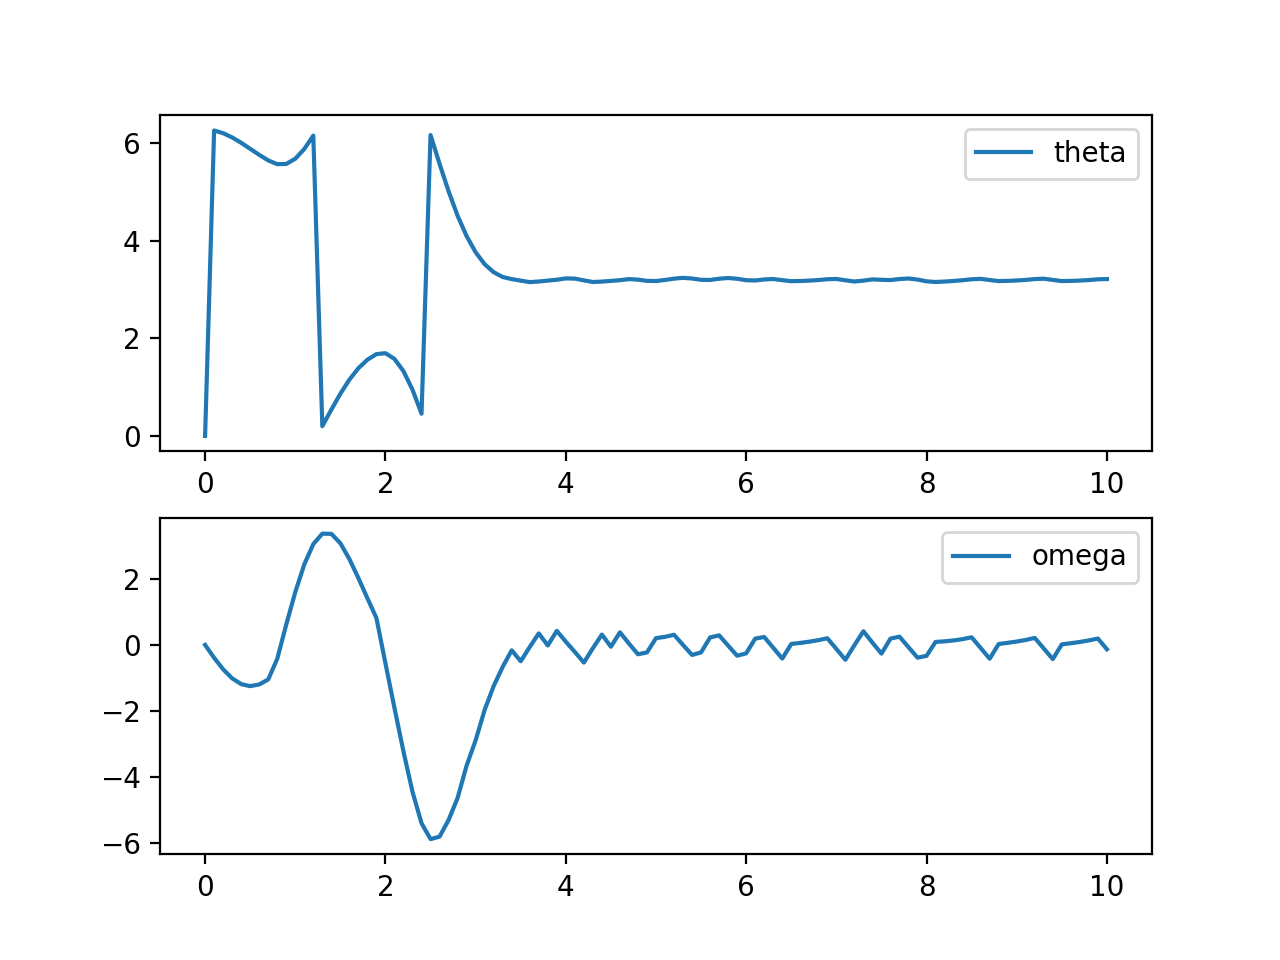

<IPython.core.display.Javascript object>


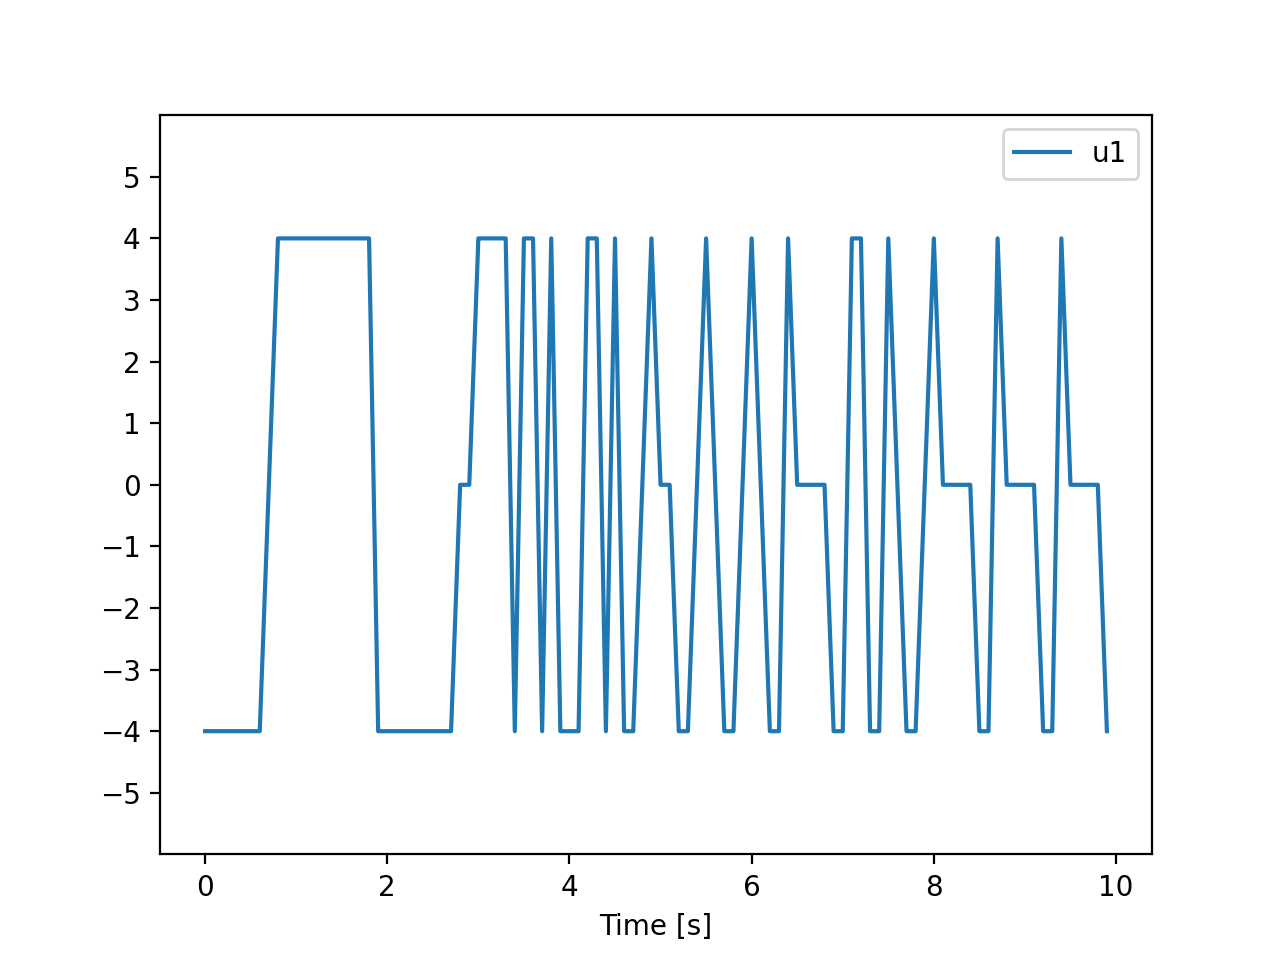

In [14]:
generatePlotsAndSimulate(x3, u3, t3, 10., QlearningSolver3.value_function, QlearningSolver3.policy, pendulum, QlearningSolver3.costEpisode, QlearningSolver3.td_error)

Creating new solver from Qlearning.py with u = 4

In [15]:
QlearningSolver4 = qSolver(u = 4, learning_rate = 0.75, epsilon_greedy = 0.65)

Training for 10000 episodes having 100 time steps in each, with alpha = 0.99, epsilon greedy = 0.65, learning rate = 0.75

In [16]:
QlearningSolver4.train(epoch = 10000)

Simulating the pendulum using the controller

In [17]:
t4, x4, u4 = pendulum.simulate(np.array([0., 0.]), QlearningSolver4.inverted_controller, 10.)

Generating all the plots and simulating the pendulum, the moving average plots have a window size of 100

<IPython.core.display.Javascript object>


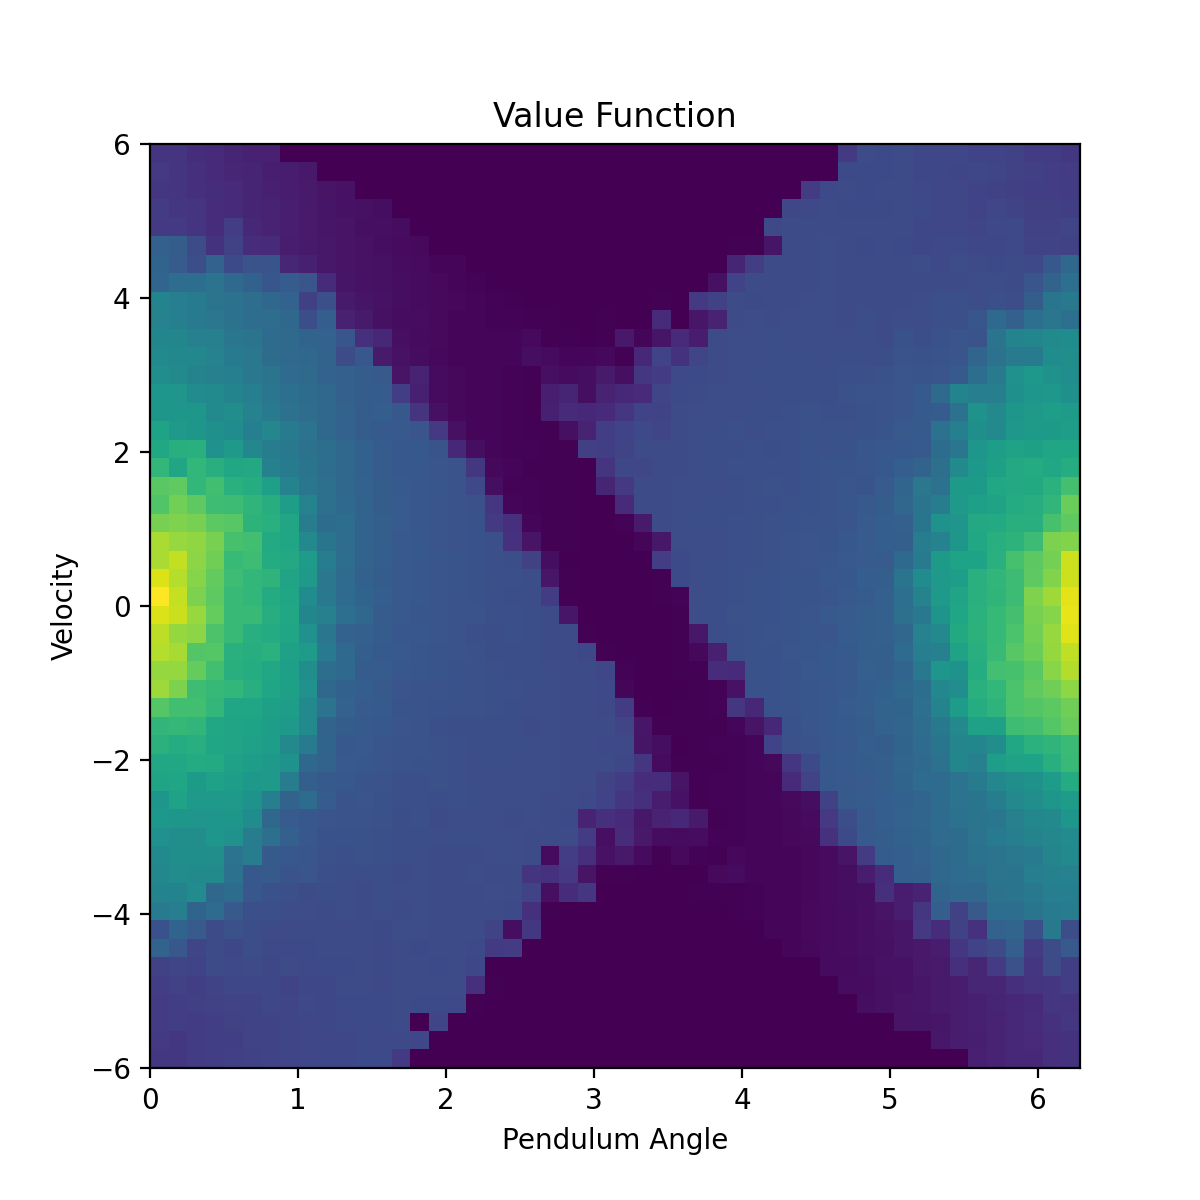

<IPython.core.display.Javascript object>


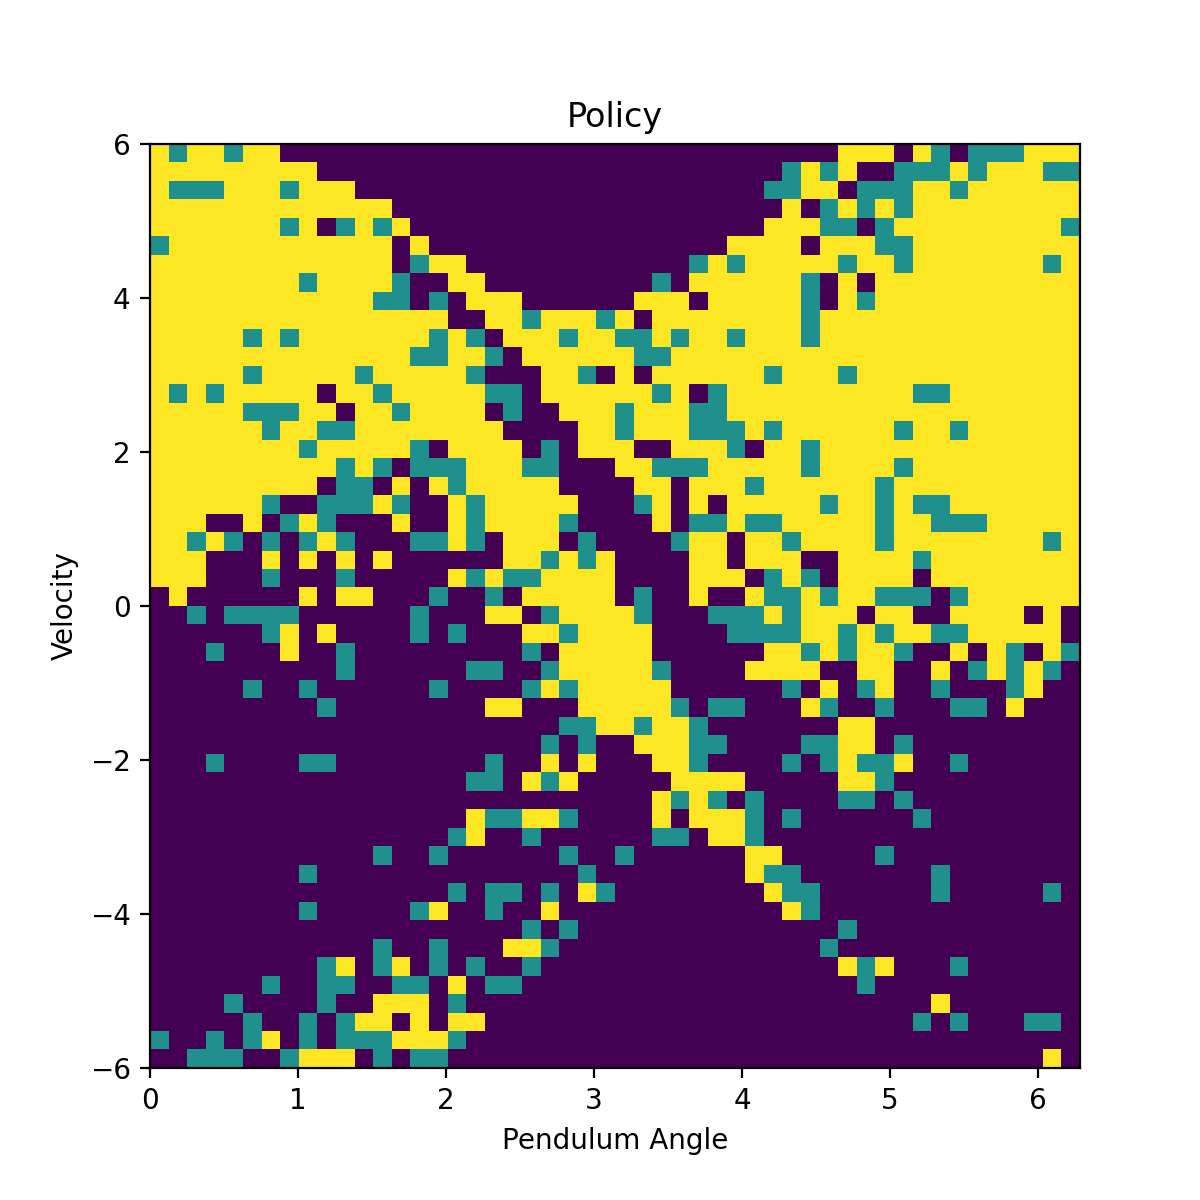

<IPython.core.display.Javascript object>


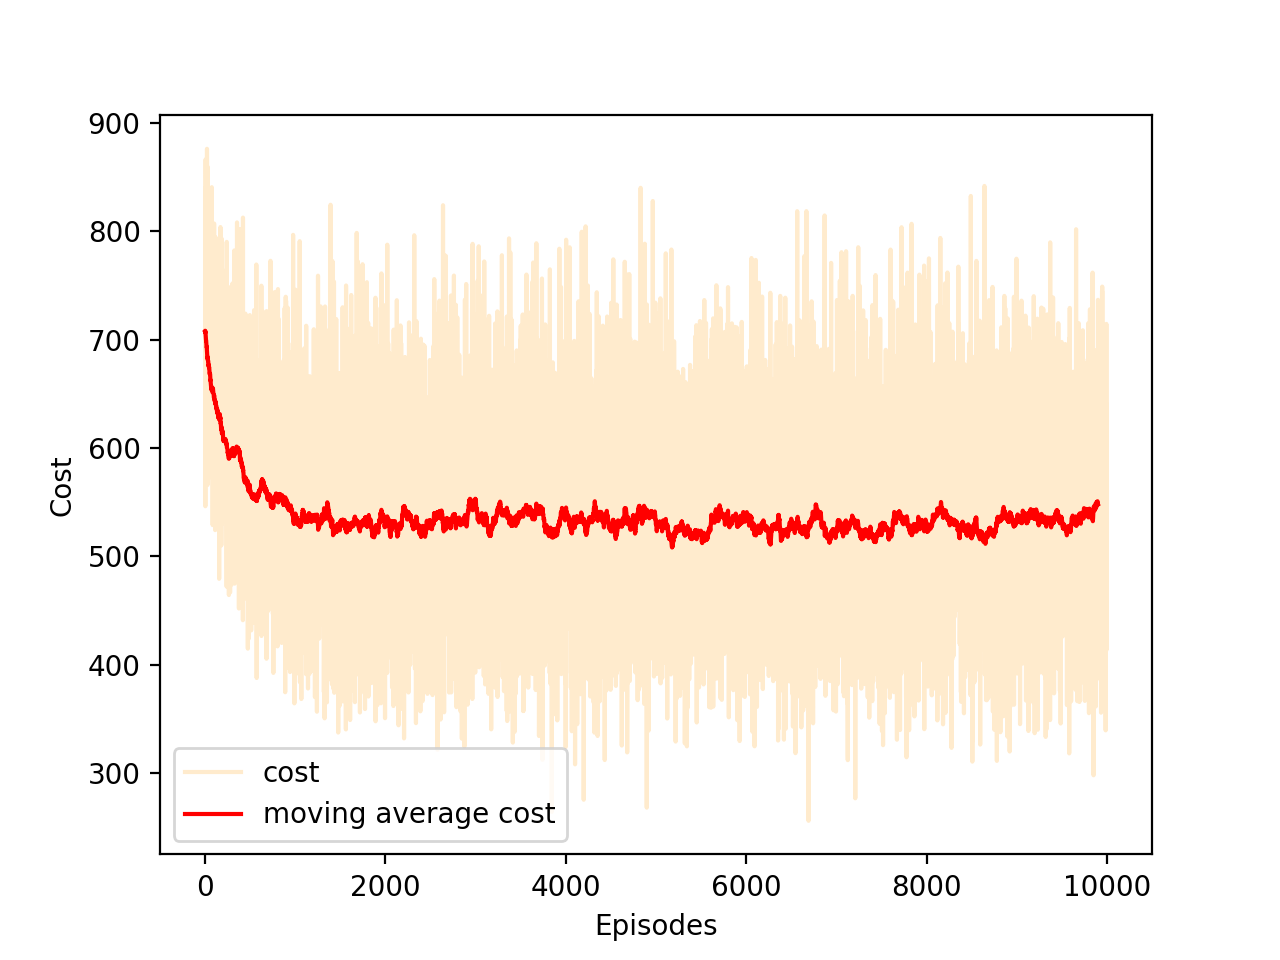

<IPython.core.display.Javascript object>


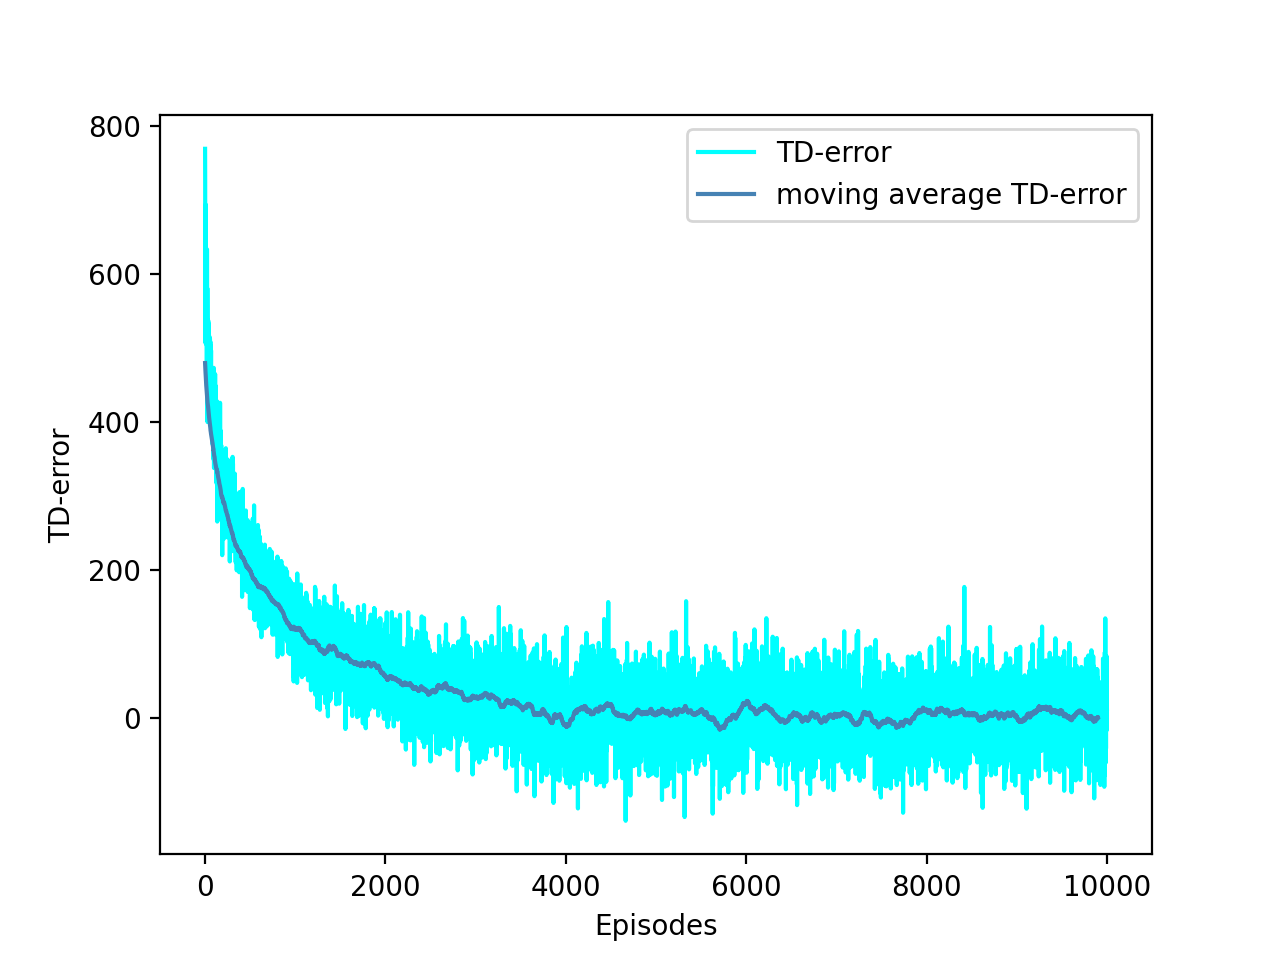

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAfuNtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
DTZliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwABR4e1643dg1tJ0AAAGsAD
pCLH/2+kONwAT9lg/NYjL/FoB9aiK4jE+YrYPvM3VJY4vjNnyLGP2YlbJp/NpBJUrBdMYUhyrz7P
5apm+oGk4bUbHFR5FzyI9ajBPlsbHoOh7z8pK0EiqMUzXsdnSuPKpMBaFdvexFsZpfdheIkeR9nc
0ITyzYHeeS6JwPjmtV2sfNoqzekXITbJ4Zh1jvl9n08hwvr7UO02jXn0Owh50dZbkF56hR4wicCv
LRwpELwO8cN8X1MJqu0gEEsxhIs6TP3YdJ0Pua9JN2ZwU30ZwVPYH+AOycAUF/b9pFk95XFVtil7
hBi+dCSaTb0xDWuZN3nGq23yvHA3IO5jOgNcsA86rABY6i3fm4ujHJ0imNhaD37uUGnV0uhFHwdH
qWMHnkkZYv5dDA2wu60wFshsv+7vyknpJNmZCjrW5fWwDsY7fk9RABc2Y/lr+wk7/NGHIb0YQQxy
RRWCFarsK/aNM2xEvpIkCQUbDhXgNX+BT8hpLy685q4JAynAJqchmsEjI/9/DUOjqzYyxR5TTRrF
7AmyAdR9vuHOb9LHOidxhkifkFnoC8u82cU/6mDvAAWWuUTbBQfyx5GxcLnqexfshUiZjj45768e
hLAs2eJLYzPFtXV2hBtoLo7+9fCQ6IpTS+KwBFeG1bCGsGrJccA+9Sbtfh/UNY8FgLXkgAuA+k0o
AAASwwUcqaY5Akvpse8jH8v9EdIcUUXL4xuks8+sDPCqFyziwU6pncxbFxX68USxJDzCQAv5XwEq
DMfXBHi/b2SmKKG3xm81Bt3y5Hv2oTUWq4CTml8VSdoHrM7pTAeJvuLAQfoDVsnK4o8YPiuUioIe
wVd24YPYo8DWI/fhC/0mQCfNRyv+TaqapFT0SgtuJwaUTUBknC2JVyjBW/5zQcq3r6yvnDtWw0Xy
bThQf3sKVRl3y3sHePLyfqdUfrWomF+aEI7/8vNSgq/vt+euGnb1b6g8iPLW9dVUECSnnrR7oYrW
t+VdpV3V9L7ZxnNp9LGfmQZvTGf9e6Q2omsxVxPmRM/5uDGk59cKi2KUZu5aSLTVT0hjpcvGMVor
Ts2bj4jRa7Cau6mIGNLvywxhJMQ7pYz8yESi+T97+Hx5avNfXDFVlYv7yTns/Qkv5Qsp5ZbCyWoX
sMk169bksieDa43Kj19Hn7Hn00VIbKf7NXZFUlyBtAepTYmAGtMOwlHEyTrJrLusHYVsLqodbjAm
u8twOYQ7ruicviQpCYYCJZn+0uVhxD/+/adz/MTGWxrm7/IaR5cpeK+gUxLWBf2S/c3wsE4g1yS1
kPpGlk2bKeEJKYPbNjNklOJ8DzOStycko4ACaZpeEqhsl9YOuC3kIr7Y4avvbJwZRyNm1KrTZzJg
j7qLuoFdmG/JvrPxSJBE69E97tFHy4S34cAcX+F46/2AEfzkTm1tCC2JBlCUzWbuOEvDfAQ6Yjhy
ufnvbCgyRG3dLkF16PT1QR1AOaEIIZrUOjIKPlULIEqHD7GcgVWwCjXlu0QjAC6pCqaUeQaRIwGp
BFCKDPHvmv6hAiTOb6XCqHwwQJWWtXWhYFPNddTtBgtqqBY13bH1m/cXCGnNzg6A7Am3pwxoEJdP
8NlTuGuPRO35iP2C7pJjfHTKTXqB3kCJfKUhtaYsX4D4CCrCVuwmMzgaaTChVSS/3PArwcsR+aSI
lT2dzdNLHk0zVGhbNMrSZ5JKeTkbx8VGyHoWMU4V820qLVobTp00hIpgFEyK55dN833eYs0HQAf4
oxsUIpuk/KY0lzEVrFy0vzmH+lFKKuHmGpp8mw7o87UtDnddee7qJNuiIJsxiSpHTAZj5lAY68IJ
0HF3jHLQgcjY8hRPun202oK71WoNeaHg0FcJ/a7zrFAta8OfBysSGELYV0+sNuoTcp0YF5dDyusQ
XbexbA1+pmkJtQcEYLvsI0SmakSnMI1Uu+9dU4MO4BULTDfjiZaZW8e20ZoiwYFENegFe8kyogwu
LAXP95k+Zbe2TRU+JMqRPuIz5W6TDMjfkuR6sptqlA4+cxeofX9rjy58lghJIQFLTM1S+nhFxfiy
qtoUk2S/Owk2Nv4NJ6U62bUTONSUSU951Gu3bGddu3ousfRbrqYyCrHgDWT26pQUQclPUSuGEShP
EQYjpln8nHQnkALktgMzl51mWsf/kYRfj3/+2R/SYa69872+gwt3xTCS4Y7Uslx4gORgJg1S7xyo
cUU45PRF1V4lbNzyUHX3OaJLrKgNMRD2L37e8rL8/x3AuY0YDnlEfvF4amIusz6804N0dQQBwZtN
xVvxY7KBh1n7ic6EvC5ATI5jQfuVbyjSFEYaj12aK8M8s/F93yeCJq4AADzvoed9KIgWMuX/y3VK
/lErJ+gAABVgAAEnB3j97kqYQRMbseSYgZzSHMzoD1ADmxniBuxL9yQ42IlqA28Rj/z+BNwGu4gU
0DlC3Bi0gRq0qEGE5YqizCI51ULUqSTtV5AkJdSBn2YEDoXBj23MCeHVo+w0CI3MXg1tWQo/fIEI
E0wO1O+pWu2soKrd6PPhjuPBjqpaNq/AhU1I7Dt+ihk8AtFdJut2SSZESd/UHZqWqu/cuw3LfkT3
0oTN0oC2xSpBduXoQA8D4w4k1JnW7tWMqPfR73rzz6rAbM6e2kfDIAMs6fpXUlzTPRDzRfp93uSr
5Kk1f3J57khAgk95g6pjtY5iHiNvvwecn5HFxLjivN+SdBHYr8rnFXWUZm3qupY7wyExD/6sWhiq
Tr7ZV61OKNF5sO0FhOu+MAHu2+QjHBpZwmb5vMJnYmmKxOQzGs5Sf/2QM2jryDEsajd+3e4v3F76
FBu13HQCGbihBzxu0988R

<IPython.core.display.Javascript object>


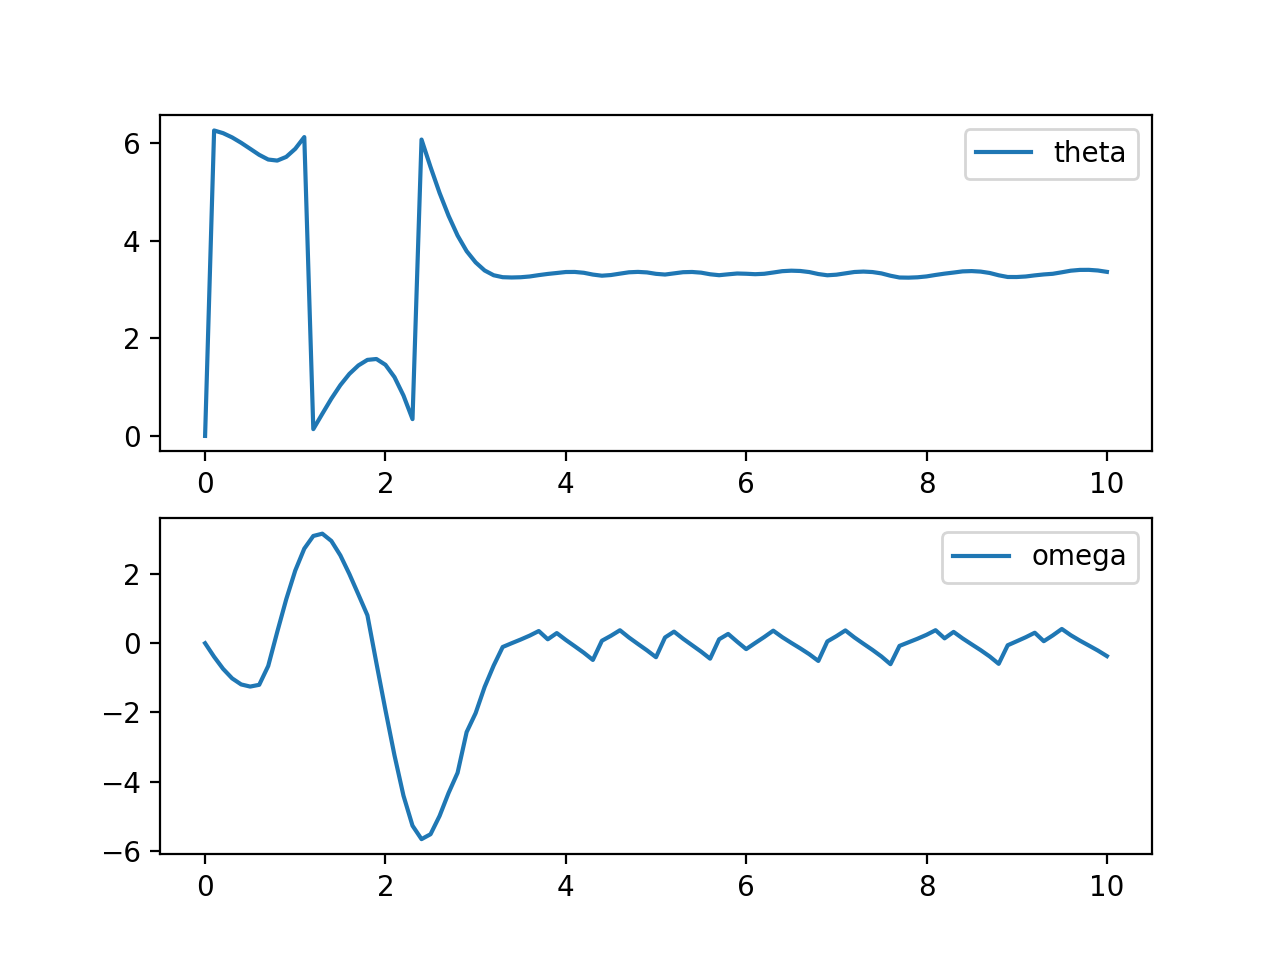

<IPython.core.display.Javascript object>


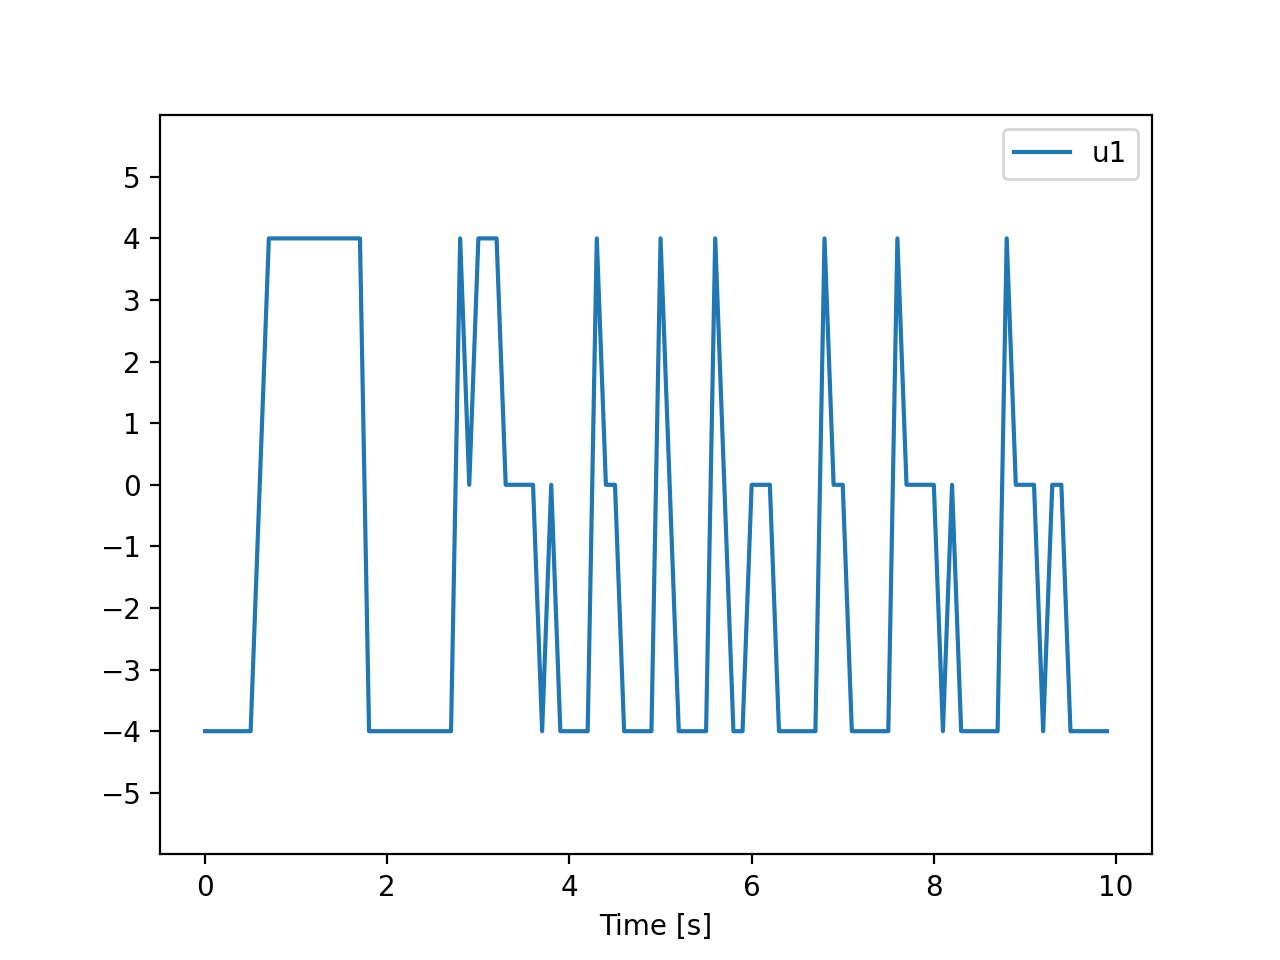

In [18]:
generatePlotsAndSimulate(x4, u4, t4, 10., QlearningSolver4.value_function, QlearningSolver4.policy, pendulum, QlearningSolver4.costEpisode, QlearningSolver4.td_error)